**Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")  # suppress warnings for cleaner output
plt.style.use('seaborn-v0_8')   # set a clean visualization style
pd.set_option('display.float_format', lambda x: f'{x:.3f}')  # limit decimals
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectKBest, f_classif

!pip install imbalanced-learn # Install if not already installed
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    RepeatedStratifiedKFold
)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    RocCurveDisplay,
    classification_report
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import shap
import matplotlib.pyplot as plt
!pip install lime
import lime
import lime.lime_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d57abeb5f9d044ad6757bd265e28748a207a6b8dc57eca7f827c87fbddfd62f5
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


**Load the Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Telco Customer Churn dataset (adjust path if needed)
df = pd.read_csv("/content/drive/MyDrive/CP2 Files/Telco-Customer-Churn.csv")

# Preview first 5 rows
print("Dataset Preview:")
df.head()

Dataset Preview:


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check         29.850         29.85    No  
1               Mailed check         56.950        1889.5    No  
2               Mailed check         53.850        108.15   Yes  
3  Bank transfer (automatic)         42.300       1840.75    No  
4           Electronic check         70.700        151.65   Yes  

[5 rows x 21 columns]

**Dataset Structure & Overview**

In [4]:
# Shape of dataset (rows, columns)
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

Dataset contains 7043 rows and 21 columns.



In [5]:
# List of column names
print("Available Features:")
print(df.columns.to_list(), "\n")

Available Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'] 



In [6]:
# Quick info about data types and missing values
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

**Missing Value Analysis**

In [7]:
# Check number of missing values per column
missing_summary = df.isnull().sum()

print("Missing Values Summary:\n")
print(missing_summary[missing_summary > 0] if missing_summary.sum() > 0 else "No missing values detected.\n")

Missing Values Summary:

No missing values detected.



**Descriptive Statistics**

In [8]:
# Summary statistics for numerical columns
print("Statistical Summary of Numerical Features:\n")
display(df.describe().transpose())

Statistical Summary of Numerical Features:



count   mean    std    min    25%    50%    75%     max
SeniorCitizen  7043.000  0.162  0.369  0.000  0.000  0.000  0.000   1.000
tenure         7043.000 32.371 24.559  0.000  9.000 29.000 55.000  72.000
MonthlyCharges 7043.000 64.762 30.090 18.250 35.500 70.350 89.850 118.750

In [9]:
# Identify categorical vs numerical columns
cat_features = df.select_dtypes(include=['object']).columns.tolist()
num_features = df.select_dtypes(exclude=['object']).columns.tolist()

# Print numerical features
print(f"Numerical Features:")
for col in num_features:
    print(f"  - {col}")

print("\n Categorical Features:")
for col in cat_features:
    print(f"  - {col}")

Numerical Features:
  - SeniorCitizen
  - tenure
  - MonthlyCharges

 Categorical Features:
  - customerID
  - gender
  - Partner
  - Dependents
  - PhoneService
  - MultipleLines
  - InternetService
  - OnlineSecurity
  - OnlineBackup
  - DeviceProtection
  - TechSupport
  - StreamingTV
  - StreamingMovies
  - Contract
  - PaperlessBilling
  - PaymentMethod
  - TotalCharges
  - Churn


In [10]:
# Special check: 'TotalCharges' is object but should be numeric
print(f"'TotalCharges' current dtype: {df['TotalCharges'].dtype}")

'TotalCharges' current dtype: object


**Fixing 'TotalCharges' Column**

In [11]:
# Strip spaces and convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')

# Check if any rows became NaN after conversion
missing_total = df['TotalCharges'].isna().sum()
print(f"Missing values in 'TotalCharges' after conversion: {missing_total}")

Missing values in 'TotalCharges' after conversion: 11


In [12]:
# Drop rows where TotalCharges could not be converted
df.dropna(subset=['TotalCharges'], inplace=True)

# Drop non-informative 'customerID' column
df.drop(columns=['customerID'], inplace=True)

print("'TotalCharges' successfully converted to float and cleaned.")

'TotalCharges' successfully converted to float and cleaned.


**Encoding Categorical Features**

In [13]:
# Make a deep copy to avoid modifying the original dataframe
df_encoded = df.copy(deep=True)

# Identify categorical (non-numeric) columns automatically
cat_features = df_encoded.select_dtypes(include=['object']).columns.tolist()

print(f"Categorical Features to Encode ({len(cat_features)}):")
for col in cat_features:
    print(f"  - {col}")

Categorical Features to Encode (16):
  - gender
  - Partner
  - Dependents
  - PhoneService
  - MultipleLines
  - InternetService
  - OnlineSecurity
  - OnlineBackup
  - DeviceProtection
  - TechSupport
  - StreamingTV
  - StreamingMovies
  - Contract
  - PaperlessBilling
  - PaymentMethod
  - Churn


In [14]:
# Apply Label Encoding to each categorical column
label_encoders = {}  # store encoders if needed later for inverse transform

for col in cat_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # save encoder for possible decoding

    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\nAll categorical features encoded successfully.")

gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Partner: {'No': np.int64(0), 'Yes': np.int64(1)}
Dependents: {'No': np.int64(0), 'Yes': np.int64(1)}
PhoneService: {'No': np.int64(0), 'Yes': np.int64(1)}
MultipleLines: {'No': np.int64(0), 'No phone service': np.int64(1), 'Yes': np.int64(2)}
InternetService: {'DSL': np.int64(0), 'Fiber optic': np.int64(1), 'No': np.int64(2)}
OnlineSecurity: {'No': np.int64(0), 'No internet service': np.int64(1), 'Yes': np.int64(2)}
OnlineBackup: {'No': np.int64(0), 'No internet service': np.int64(1), 'Yes': np.int64(2)}
DeviceProtection: {'No': np.int64(0), 'No internet service': np.int64(1), 'Yes': np.int64(2)}
TechSupport: {'No': np.int64(0), 'No internet service': np.int64(1), 'Yes': np.int64(2)}
StreamingTV: {'No': np.int64(0), 'No internet service': np.int64(1), 'Yes': np.int64(2)}
StreamingMovies: {'No': np.int64(0), 'No internet service': np.int64(1), 'Yes': np.int64(2)}
Contract: {'Month-to-month': np.int64(0), 'One year': np.int64(1), 'Two 

**Summary Statistics After Encoding**

In [15]:
# Generate statistical summary for all features after encoding
encoded_summary = df_encoded.describe().transpose()

# Round values for readability
encoded_summary = encoded_summary.round(2)

# Display summary statistics
print("Summary Statistics of Encoded Dataset:\n")
display(encoded_summary)

# Highlight observations
print("\n Observations:")
print("- All categorical variables have been successfully converted into numeric values.")
print("- Binary variables (e.g., 'gender', 'Partner', 'Churn') now show min=0, max=1.")
print("- Multi-class categorical variables (e.g., 'Contract', 'PaymentMethod') have integer-coded categories.")
print("- Continuous features such as 'tenure', 'MonthlyCharges', and 'TotalCharges' retain their natural numeric range.")

Summary Statistics of Encoded Dataset:



count     mean      std    min     25%      50%      75%  \
gender           7032.000    0.500    0.500  0.000   0.000    1.000    1.000   
SeniorCitizen    7032.000    0.160    0.370  0.000   0.000    0.000    0.000   
Partner          7032.000    0.480    0.500  0.000   0.000    0.000    1.000   
Dependents       7032.000    0.300    0.460  0.000   0.000    0.000    1.000   
tenure           7032.000   32.420   24.550  1.000   9.000   29.000   55.000   
PhoneService     7032.000    0.900    0.300  0.000   1.000    1.000    1.000   
MultipleLines    7032.000    0.940    0.950  0.000   0.000    1.000    2.000   
InternetService  7032.000    0.870    0.740  0.000   0.000    1.000    1.000   
OnlineSecurity   7032.000    0.790    0.860  0.000   0.000    1.000    2.000   
OnlineBackup     7032.000    0.910    0.880  0.000   0.000    1.000    2.000   
DeviceProtection 7032.000    0.900    0.880  0.000   0.000    1.000    2.000   
TechSupport      7032.000    0.800    0.860  0.000   0.000    1.000    2.000   
StreamingTV      7032.000    0.980    0.890  0.000   0.000    1.000    2.000   
StreamingMovies  7032.000    0.990    0.890  0.000   0.000    1.000    2.000   
Contract         7032.000    0.690    0.830  0.000   0.000    0.000    1.000   
PaperlessBilling 7032.000    0.590    0.490  0.000   0.000    1.000    1.000   
PaymentMethod    7032.000    1.570    1.070  0.000   1.000    2.000    2.000   
MonthlyCharges   7032.000   64.800   30.090 18.250  35.590   70.350   89.860   
TotalCharges     7032.000 2283.300 2266.770 18.800 401.450 1397.480 3794.740   
Churn            7032.000    0.270    0.440  0.000   0.000    0.000    1.000   

                      max  
gender              1.000  
SeniorCitizen       1.000  
Partner             1.000  
Dependents          1.000  
tenure             72.000  
PhoneService        1.000  
MultipleLines       2.000  
InternetService     2.000  
OnlineSecurity      2.000  
OnlineBackup        2.000  
DeviceProtection    2.000  
TechSupport         2.000  
StreamingTV         2.000  
StreamingMovies     2.000  
Contract            2.000  
PaperlessBilling    1.000  
PaymentMethod       3.000  
MonthlyCharges    118.750  
TotalCharges     8684.800  
Churn               1.000


 Observations:
- All categorical variables have been successfully converted into numeric values.
- Binary variables (e.g., 'gender', 'Partner', 'Churn') now show min=0, max=1.
- Multi-class categorical variables (e.g., 'Contract', 'PaymentMethod') have integer-coded categories.
- Continuous features such as 'tenure', 'MonthlyCharges', and 'TotalCharges' retain their natural numeric range.


**Splitting Features: Numerical vs Categorical**

In [16]:
# Identify categorical and numerical features using data types
categorical_features = df_encoded.select_dtypes(include=['int64', 'object']).columns.tolist()
numerical_features = df_encoded.select_dtypes(include=['float64']).columns.tolist()

# In this dataset, some encoded categorical features are stored as int (0/1/2)
# → manually adjust the classification:
for col in df_encoded.columns:
    if df_encoded[col].nunique() <= 6 and col not in categorical_features:
        categorical_features.append(col)
    elif df_encoded[col].nunique() > 6 and col not in numerical_features:
        numerical_features.append(col)

# Remove duplicates (if any)
categorical_features = list(set(categorical_features))
numerical_features = list(set(numerical_features))

# Display results
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['PaperlessBilling', 'Dependents', 'Churn', 'gender', 'Contract', 'PhoneService', 'OnlineSecurity', 'tenure', 'SeniorCitizen', 'TechSupport', 'MultipleLines', 'StreamingTV', 'DeviceProtection', 'InternetService', 'Partner', 'PaymentMethod', 'StreamingMovies', 'OnlineBackup']
Numerical Features: ['MonthlyCharges', 'TotalCharges', 'tenure']


# **EDA**

**Comparing Feature Means: Churn vs Non-Churn**

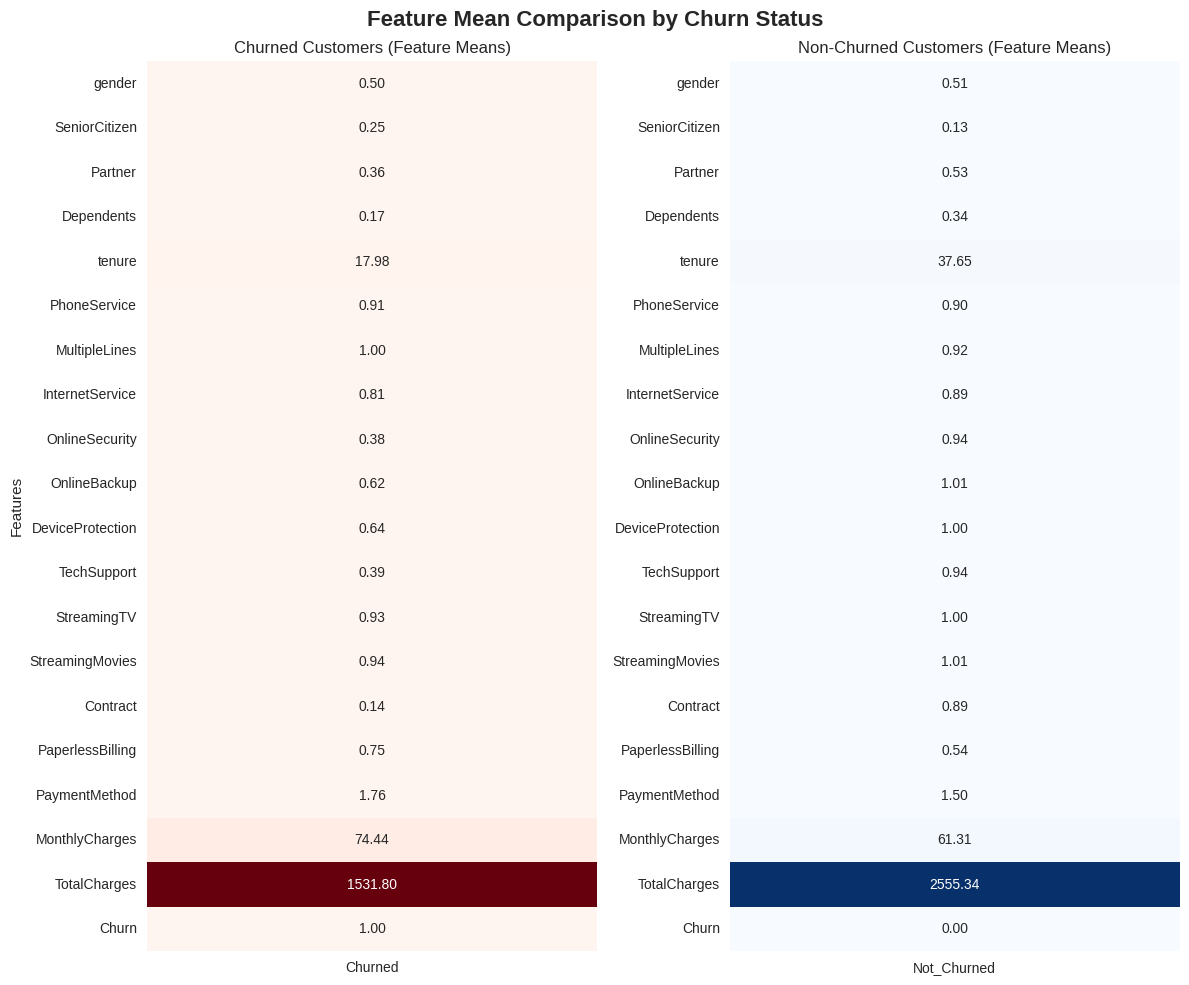

In [17]:
# Separate churned and non-churned customers
churned = df_encoded[df_encoded['Churn'] == 1]
not_churned = df_encoded[df_encoded['Churn'] == 0]

# Compute mean values for both groups
churn_means = churned.mean().to_frame(name='Churned')
not_churn_means = not_churned.mean().to_frame(name='Not_Churned')

# Plot vertical heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 10))  # Taller height for vertical display

# Churned customers
sns.heatmap(churn_means, annot=True, cmap="Reds", fmt=".2f", cbar=False, ax=axes[0])
axes[0].set_title("Churned Customers (Feature Means)")
axes[0].set_ylabel("Features")
axes[0].set_xlabel("")

# Non-churned customers
sns.heatmap(not_churn_means, annot=True, cmap="Blues", fmt=".2f", cbar=False, ax=axes[1])
axes[1].set_title("Non-Churned Customers (Feature Means)")
axes[1].set_ylabel("")
axes[1].set_xlabel("")

# Overall layout
plt.suptitle("Feature Mean Comparison by Churn Status", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


**Target Variable Visualization (Churn)**

Churn Distribution (Counts):
 Churn
0    5163
1    1869
Name: count, dtype: int64

Churn Distribution (Percentages):
 Churn
0   73.420
1   26.580
Name: proportion, dtype: float64


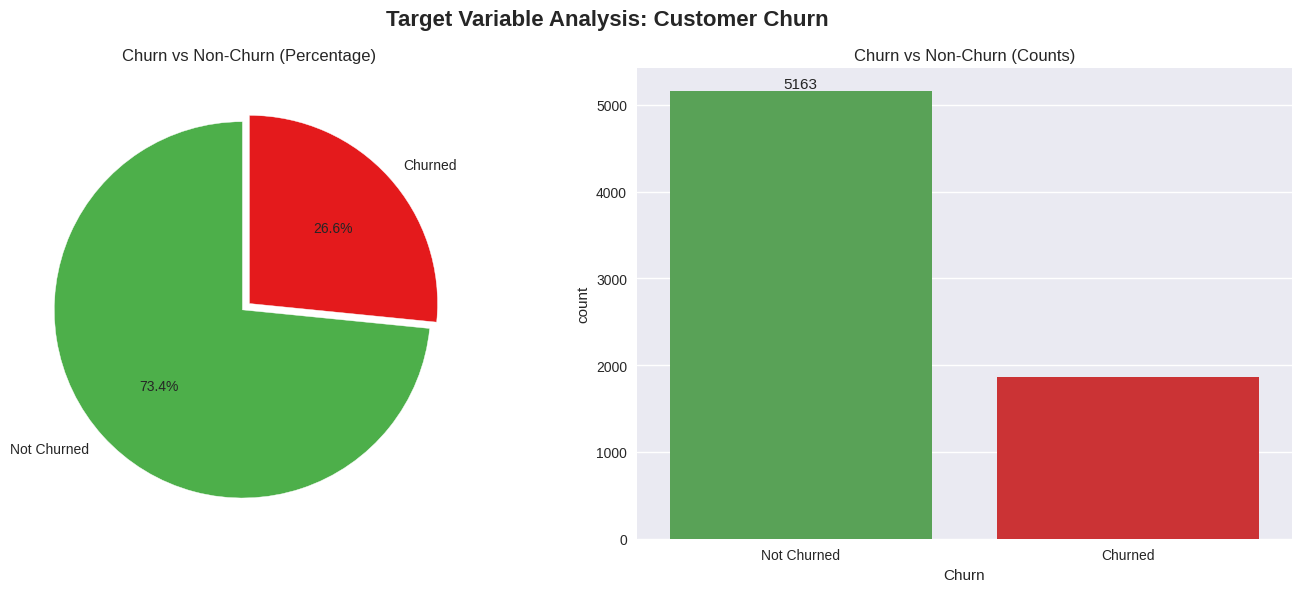

In [18]:
# Compute churn distribution
churn_counts = df_encoded['Churn'].value_counts()
churn_percentages = df_encoded['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution (Counts):\n", churn_counts)
print("\nChurn Distribution (Percentages):\n", churn_percentages.round(2))

# Visualization: Pie Chart + Countplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart (percentage distribution)
axes[0].pie(
    churn_counts,
    labels=['Not Churned', 'Churned'],
    autopct='%1.1f%%',
    explode=(0.05, 0),
    colors=['#4daf4a', '#e41a1c'],
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
axes[0].set_title("Churn vs Non-Churn (Percentage)")

# Countplot (absolute distribution)
sns.countplot(
    x='Churn',
    data=df_encoded,
    palette=['#4daf4a', '#e41a1c'],
    ax=axes[1]
)
axes[1].bar_label(axes[1].containers[0], fontsize=11)
axes[1].set_xticklabels(['Not Churned', 'Churned'])
axes[1].set_title("Churn vs Non-Churn (Counts)")

plt.suptitle("Target Variable Analysis: Customer Churn", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

**Categorical Features vs Churn (Group 1: Customer Info)**

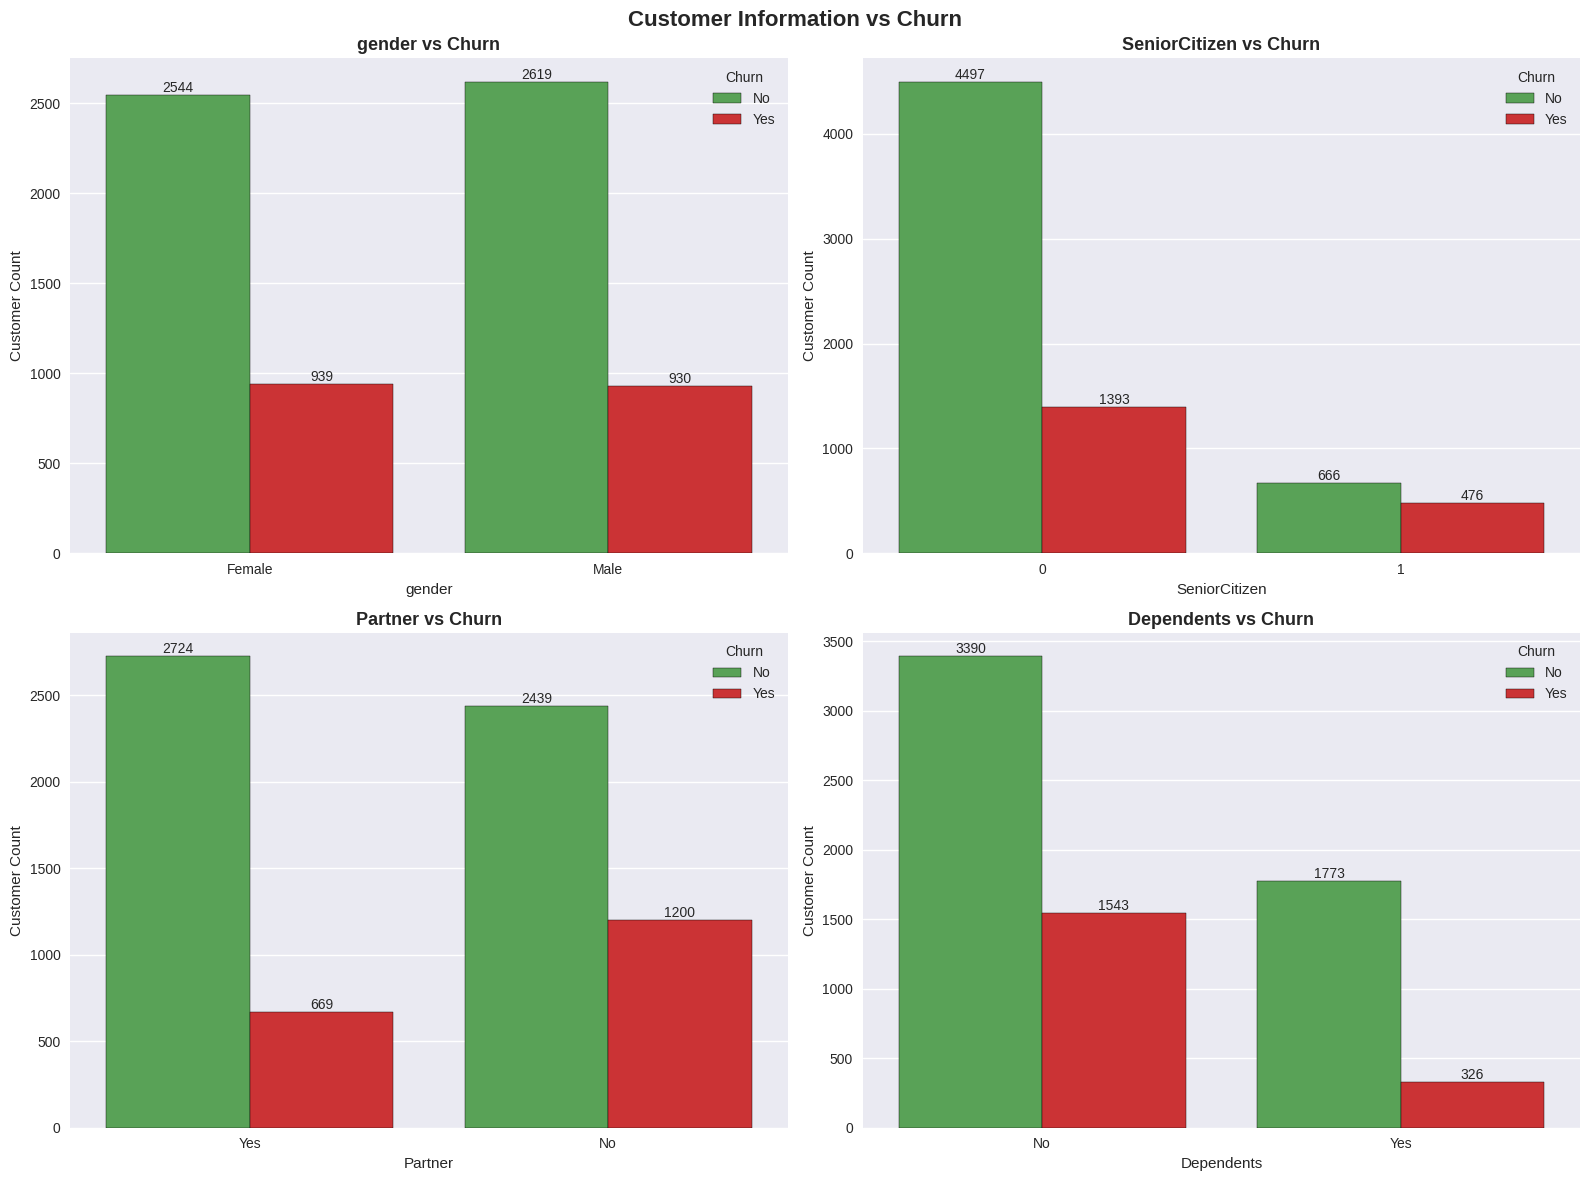

In [19]:
# Group 1: Customer information features
group1_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Loop through features
for i, col in enumerate(group1_features):
    sns.countplot(
        data=df,
        x=col,
        hue="Churn",
        palette=["#4daf4a", "#e41a1c"],
        edgecolor="black",
        ax=axes[i]
    )
    # Add labels on top of bars
    for container in axes[i].containers:
        axes[i].bar_label(container, fontsize=10)

    axes[i].set_title(f"{col} vs Churn", fontsize=13, fontweight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Customer Count")

# Overall title
plt.suptitle("Customer Information vs Churn", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

**Categorical Features vs Churn (Group 2: Services)**

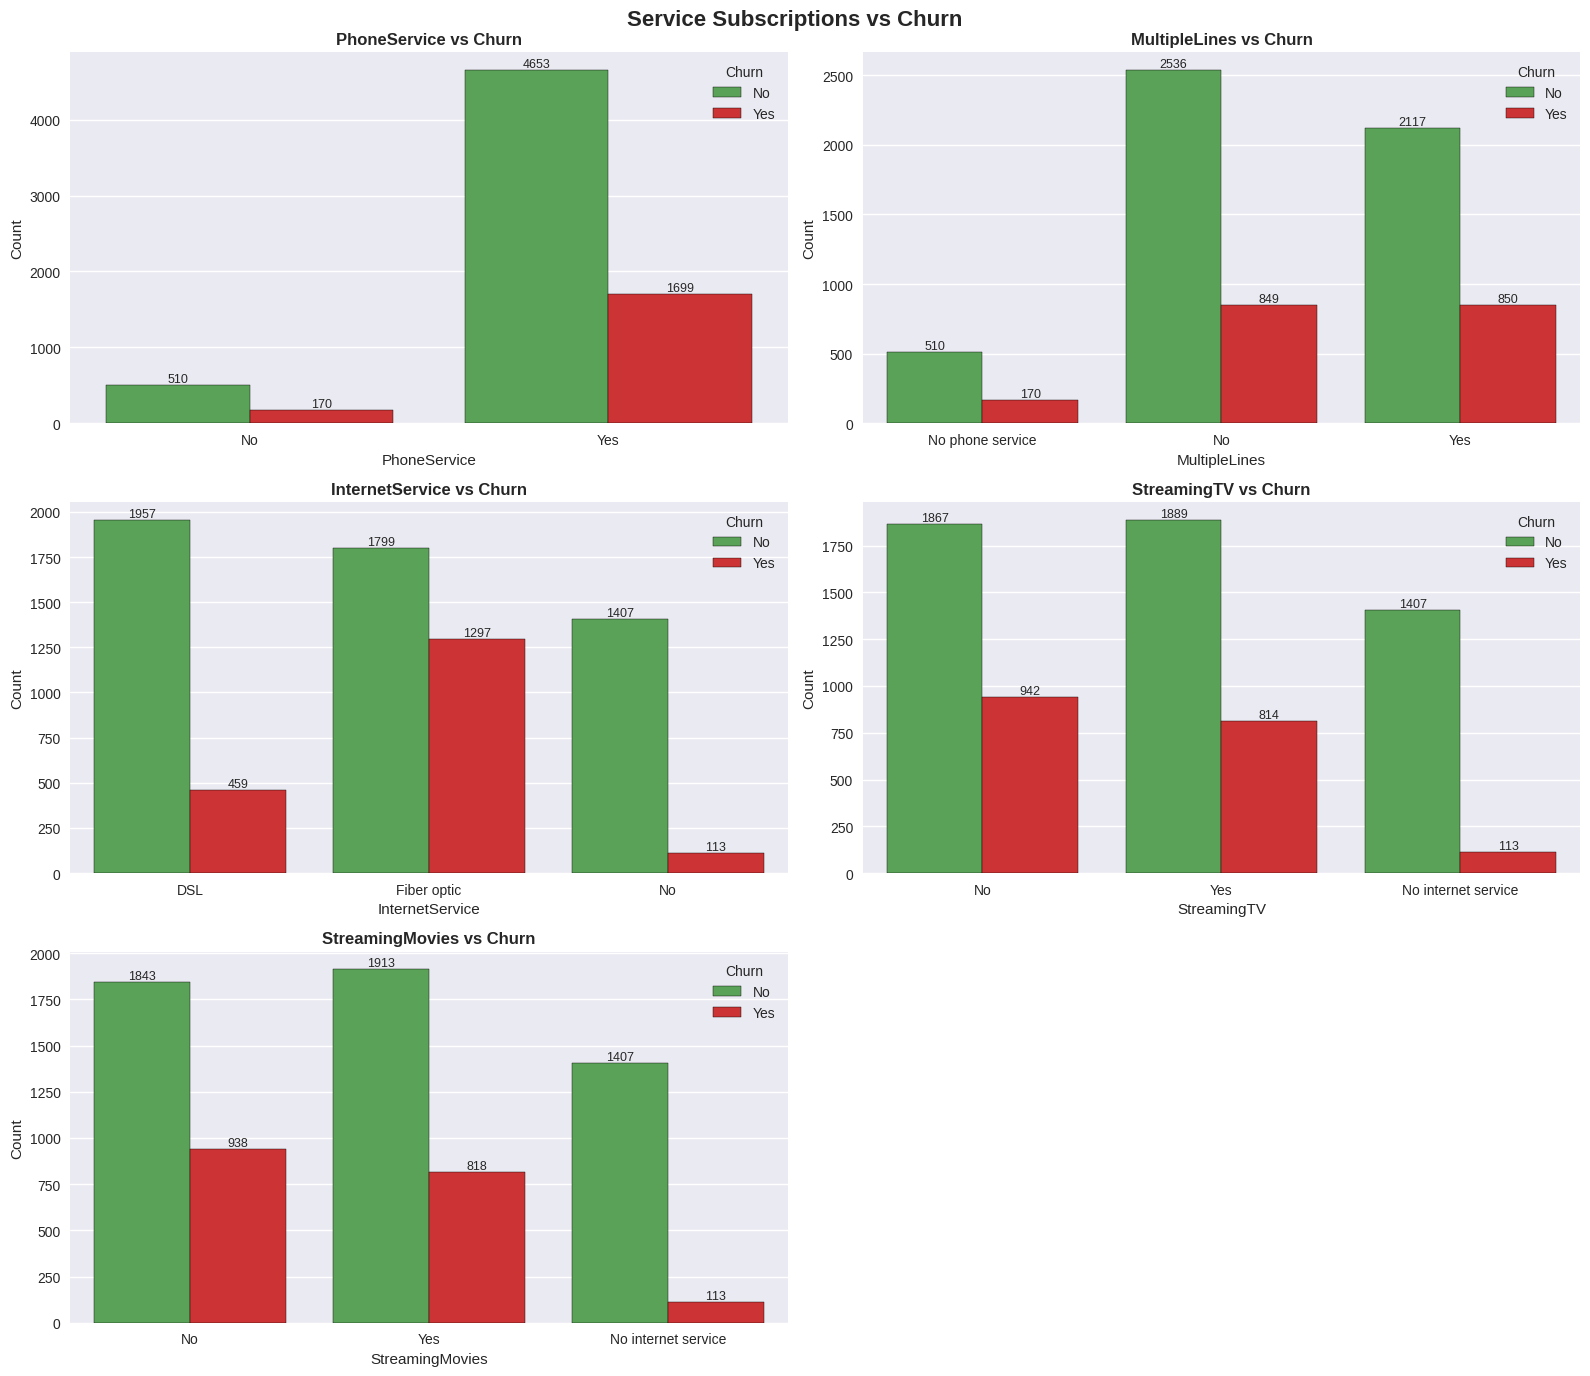

In [20]:
# Group 2: Services Subscribed
group2_features = ['PhoneService', 'MultipleLines', 'InternetService',
                   'StreamingTV', 'StreamingMovies']

# Create subplots (5 features → arrange in 3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.flatten()

# Loop through features
for i, col in enumerate(group2_features):
    sns.countplot(
        data=df,
        x=col,
        hue="Churn",
        palette=["#4daf4a", "#e41a1c"],
        edgecolor="black",
        ax=axes[i]
    )
    # Add value labels above bars
    for container in axes[i].containers:
        axes[i].bar_label(container, fontsize=9)

    axes[i].set_title(f"{col} vs Churn", fontsize=12, fontweight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hide the last empty subplot (since 5 features < 6 subplots)
fig.delaxes(axes[-1])

# Overall title
plt.suptitle("Service Subscriptions vs Churn", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

**Categorical Features vs Churn (Group 2 - Part 2: Protection & Support Services)**

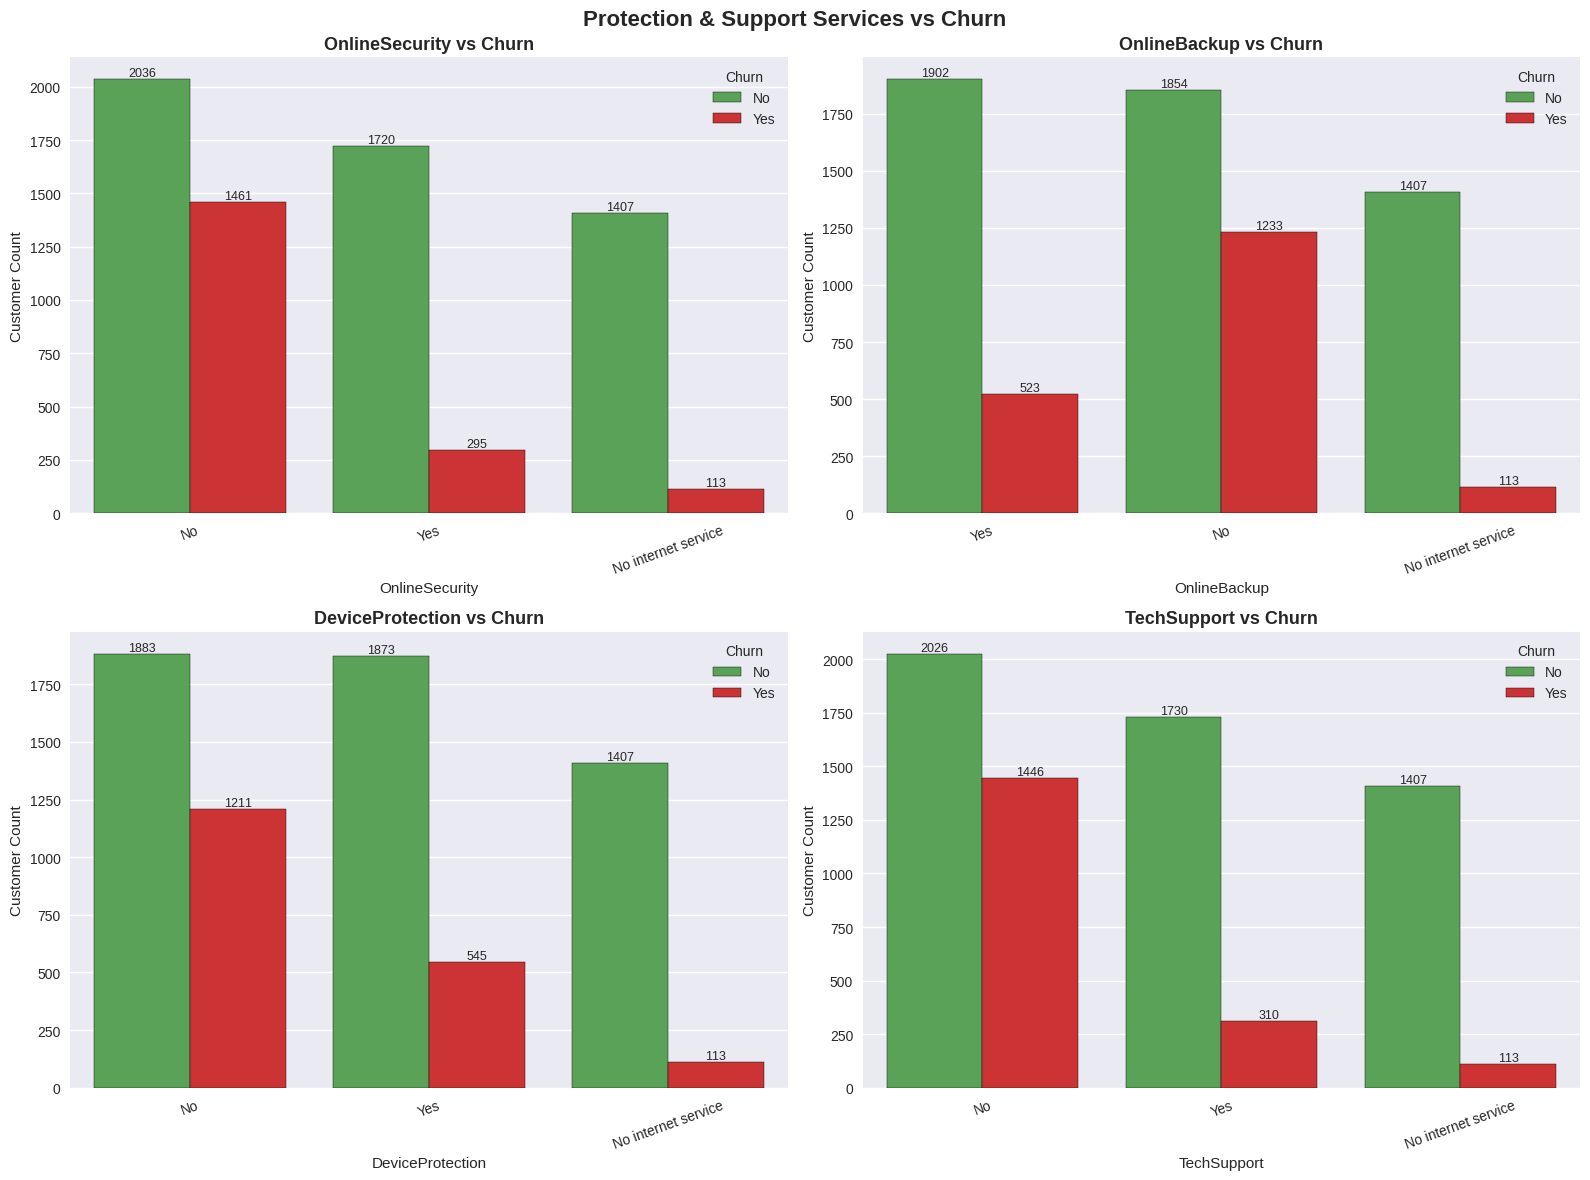

In [21]:
# Use original (non-encoded) dataset for clarity in plots
group2b_features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# Create subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Loop through categorical features
for i, col in enumerate(group2b_features):
    sns.countplot(
        data=df,      # 👈 original dataset (not label encoded)
        x=col,
        hue="Churn",
        palette=["#4daf4a", "#e41a1c"],
        edgecolor="black",
        ax=axes[i]
    )

    # Add labels above bars
    for container in axes[i].containers:
        axes[i].bar_label(container, fontsize=9)

    axes[i].set_title(f"{col} vs Churn", fontsize=13, fontweight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Customer Count")
    axes[i].tick_params(axis="x", rotation=20)  # Rotate for readability

# Overall title
plt.suptitle("Protection & Support Services vs Churn", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

**Categorical Features vs Churn (Group 3: Payment Info)**

**Numerical Features - Distribution Analysis**

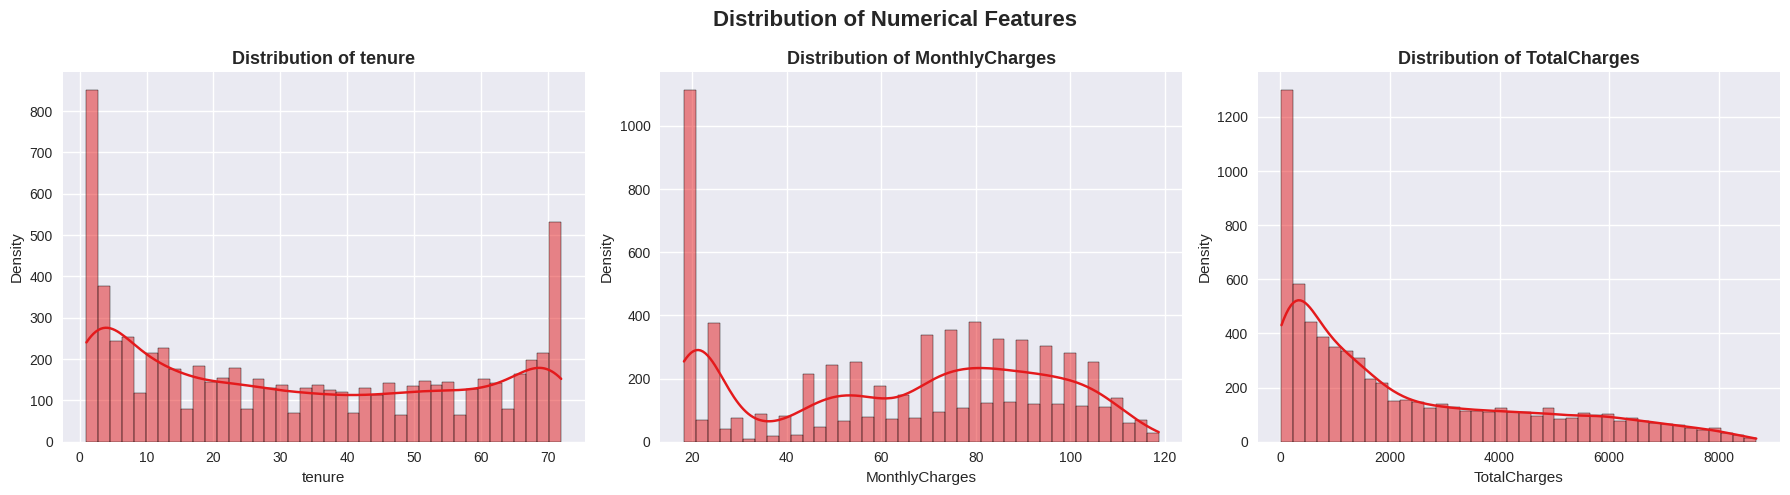

In [22]:
# List of numerical features
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop through numerical features
for i, col in enumerate(num_features):
    sns.histplot(
        data=df,
        x=col,
        bins=40,
        kde=True,          # Show density curve
        color="#e41a1c",   # Red color for visibility
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {col}", fontsize=13, fontweight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

# Overall title
plt.suptitle("Distribution of Numerical Features", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

**Numerical Features vs Churn (with Binning)**

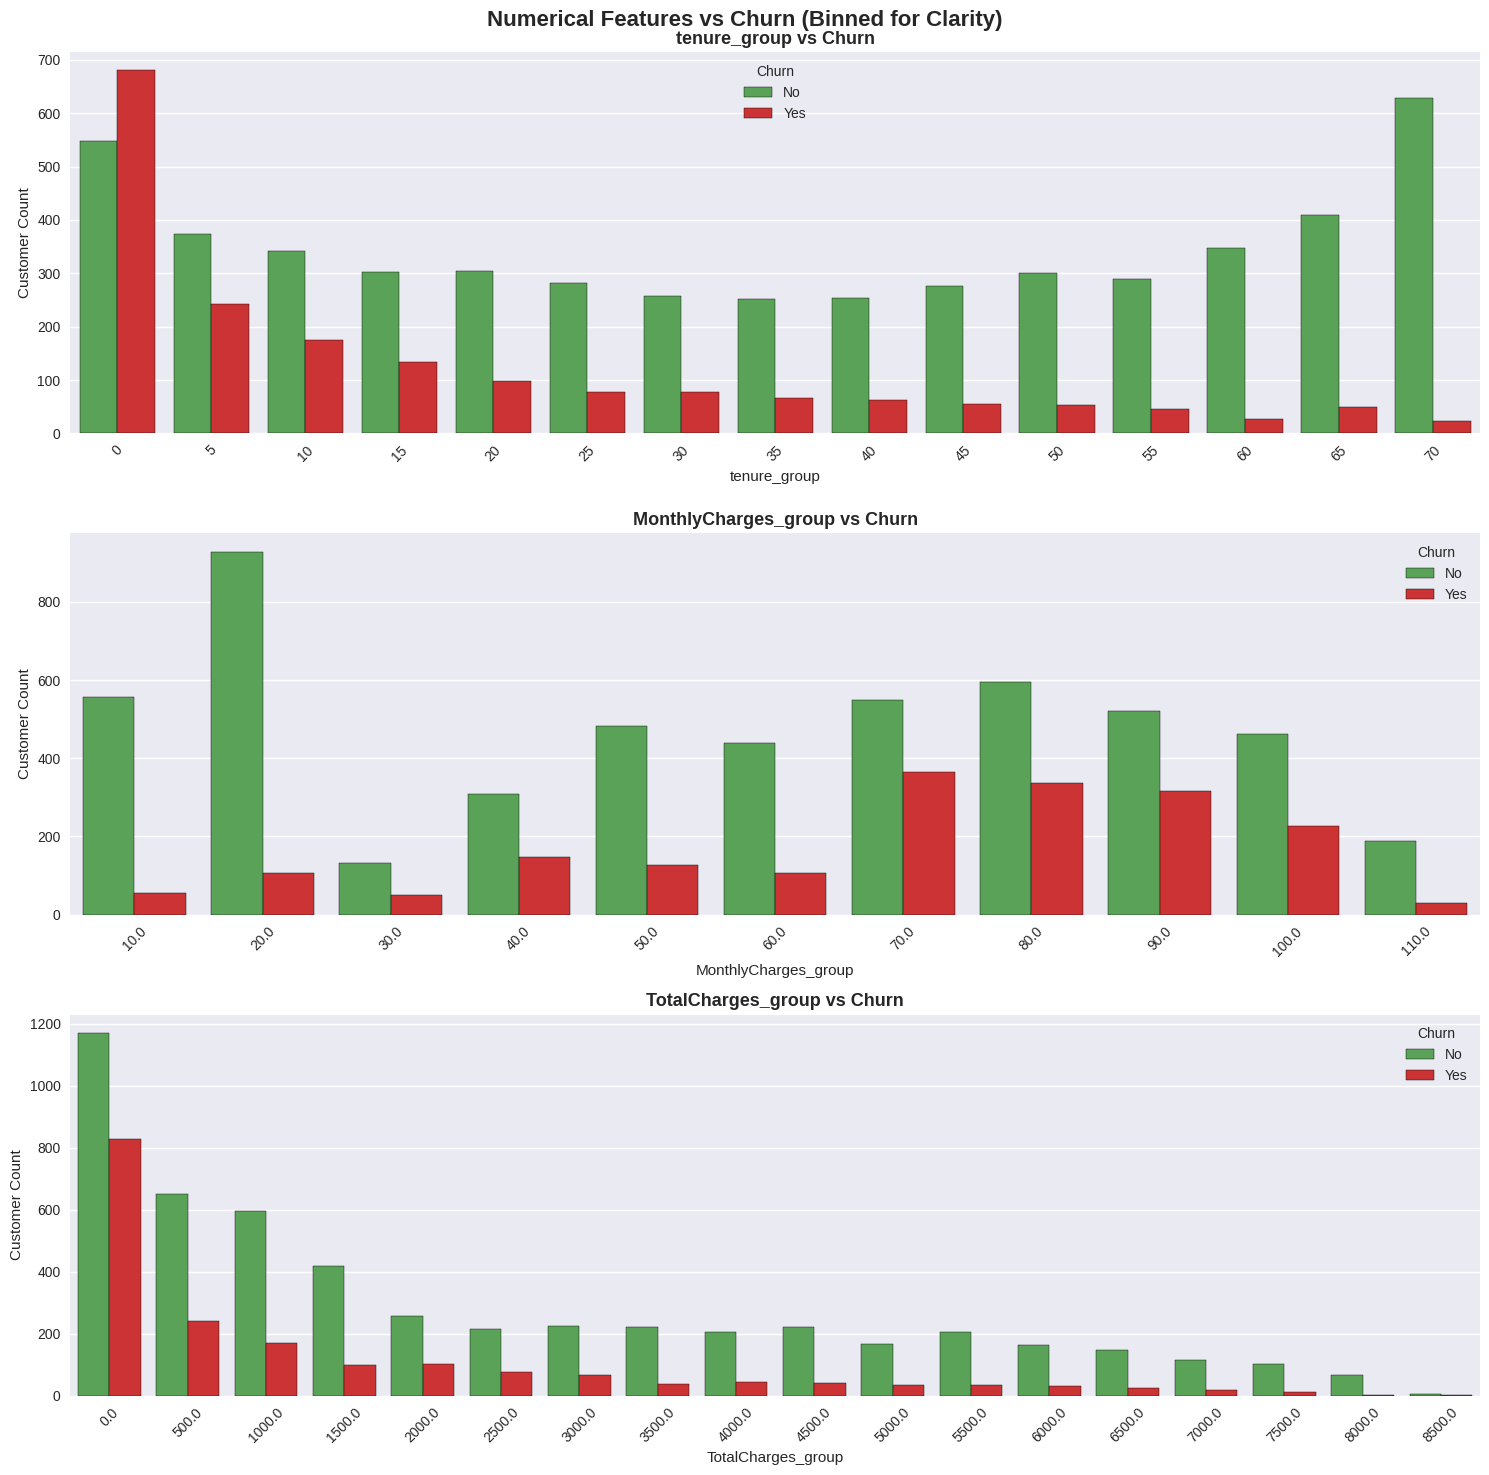

In [23]:
# Make a copy of dataset for binning
df_num = df.copy()

# Create binned features for better visualization
df_num['tenure_group'] = (df_num['tenure'] // 5) * 5   # Bin every 5 months
df_num['MonthlyCharges_group'] = (df_num['MonthlyCharges'] // 10) * 10  # Bin every $10
df_num['TotalCharges_group'] = (df_num['TotalCharges'] // 500) * 500    # Bin every $500

# Features to plot
num_binned = ['tenure_group', 'MonthlyCharges_group', 'TotalCharges_group']

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

# Loop through binned features
for i, col in enumerate(num_binned):
    sns.countplot(
        data=df_num,
        x=col,
        hue="Churn",
        palette=["#4daf4a", "#e41a1c"],
        edgecolor="black",
        ax=axes[i]
    )
    axes[i].set_title(f"{col} vs Churn", fontsize=13, fontweight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Customer Count")
    axes[i].tick_params(axis="x", rotation=45)

# Overall title
plt.suptitle("Numerical Features vs Churn (Binned for Clarity)", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

**Correlation Heatmap (Numerical Features + Churn)**

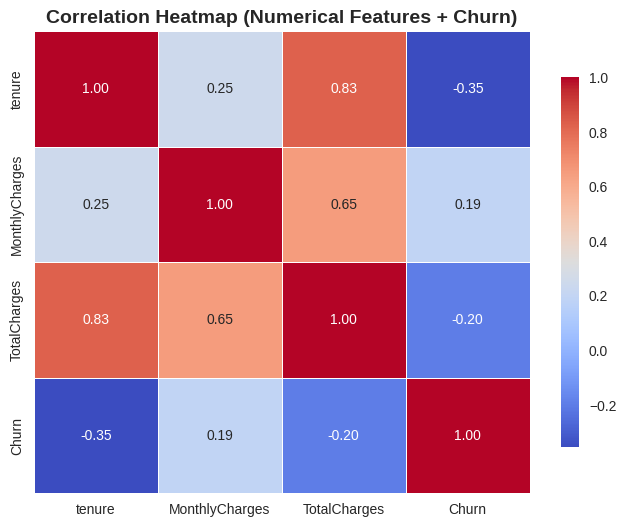

In [24]:
# Copy dataset for correlation analysis
df_corr = df.copy()

# Encode churn for numeric correlation
df_corr['Churn'] = df_corr['Churn'].map({'No': 0, 'Yes': 1})

# Select numerical columns + Churn
num_corr = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Compute correlation matrix
corr_matrix = df_corr[num_corr].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,           # Show correlation values
    fmt=".2f",            # Format numbers
    cmap="coolwarm",      # Diverging color scheme
    linewidths=0.5,       # Add grid lines
    cbar_kws={'shrink': 0.8}
)
plt.title("Correlation Heatmap (Numerical Features + Churn)", fontsize=14, fontweight="bold")
plt.show()

**Feature Engineering - Data Scaling**

In [25]:
# Copy dataset
df_scaled = df.copy()

# Drop the binned features (used only for visualization)
df_scaled.drop(columns=['MonthlyCharges_Group', 'TotalCharges_Group'], errors='ignore', inplace=True)

# Initialize scalers
mms = MinMaxScaler()       # Normalization (0 to 1 scale)
ss = StandardScaler()      # Standardization (mean=0, std=1) - not used here

# Apply MinMaxScaler to skewed/bimodal numerical features
df_scaled[['tenure', 'MonthlyCharges', 'TotalCharges']] = mms.fit_transform(
    df_scaled[['tenure', 'MonthlyCharges', 'TotalCharges']]
)

# Preview scaled data
df_scaled.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No   0.000           No   
1    Male              0      No         No   0.465          Yes   
2    Male              0      No         No   0.014          Yes   
3    Male              0      No         No   0.620           No   
4  Female              0      No         No   0.014          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           0.115         0.001   
1               No               Mailed check           0.385         0.216   
2              Yes               Mailed check           0.354         0.010   
3               No  Bank transfer (automatic)           0.239         0.210   
4              Yes           Electronic check           0.522         0.015   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

**Correlation Matrix - Feature Relationships**

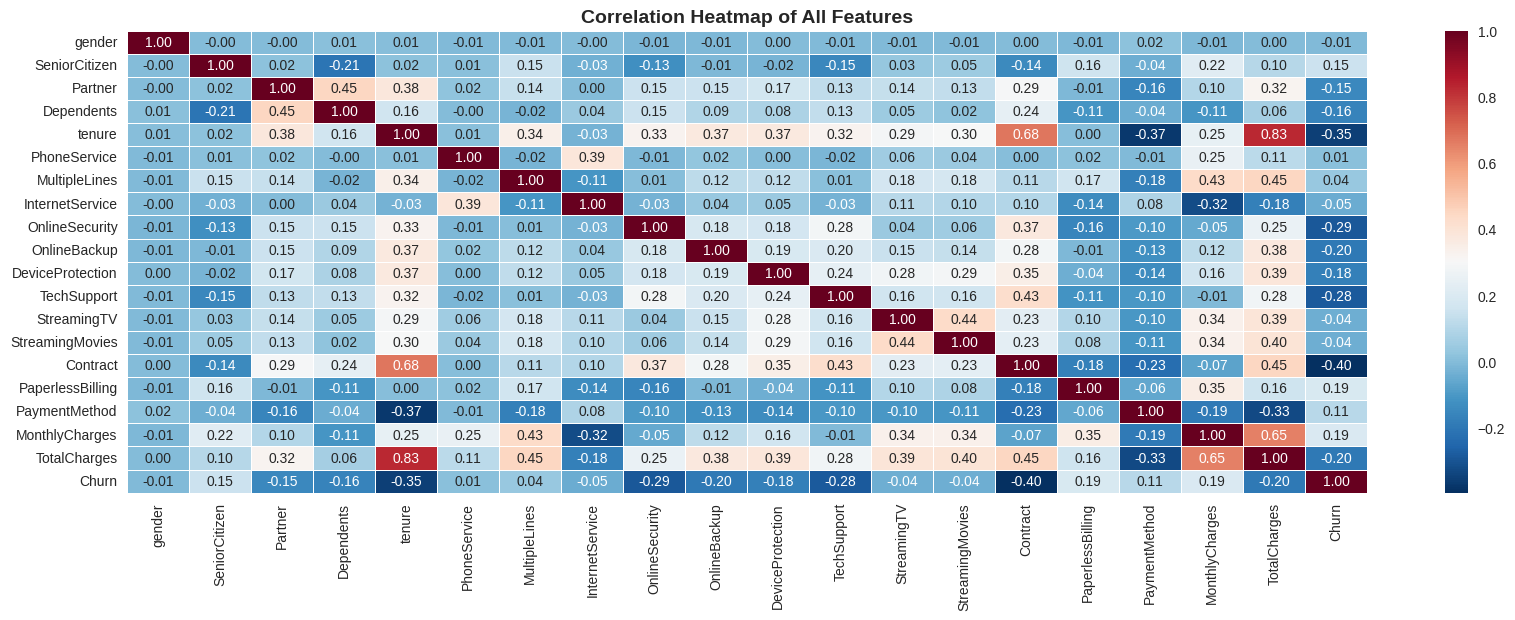

In [26]:
plt.figure(figsize=(20, 6))

# Heatmap of correlation matrix
sns.heatmap(
    df_encoded.corr(),        # correlation of encoded dataset
    cmap="RdBu_r",           # red-blue diverging colormap
    annot=True,              # show correlation values
    fmt=".2f",               # format values
    linewidths=0.5,          # thin grid lines
    cbar=True                # show color bar
)

plt.title("Correlation Heatmap of All Features", fontsize=14, fontweight="bold")
plt.show()

**Correlation of Features with Churn**

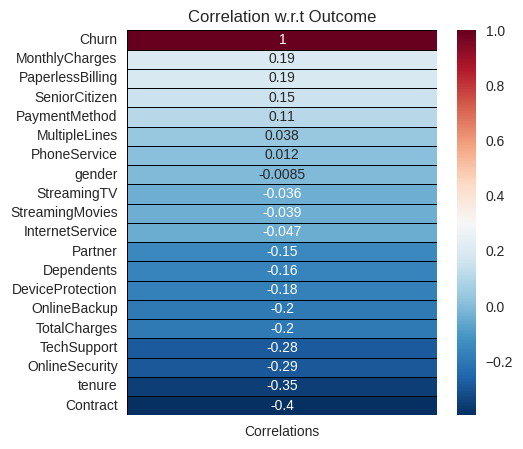

In [27]:
corr = df_encoded.corrwith(df_encoded['Churn']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap="RdBu_r", linewidths=0.4, linecolor='black')
plt.title('Correlation w.r.t Outcome')
plt.show()

**Feature Selection for Categorical Features using Chi-Squared Test**

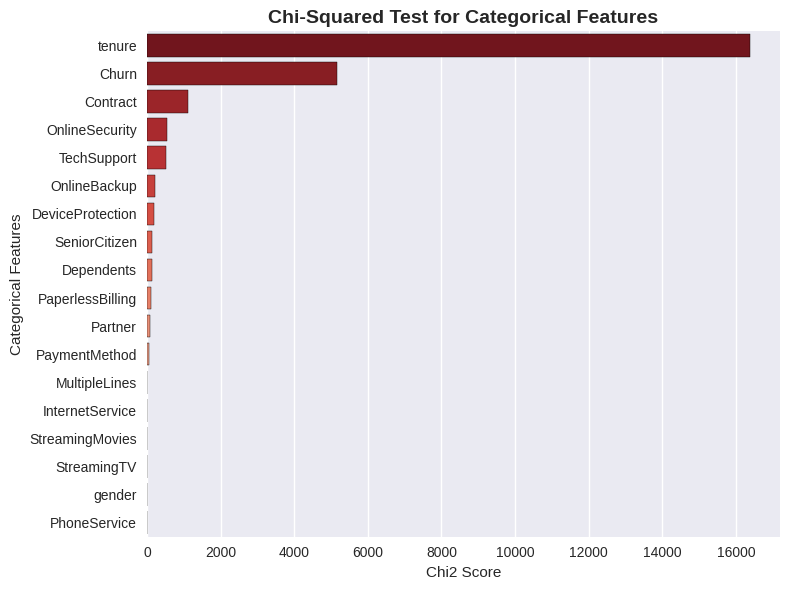

Feature  Chi2 Score
7             tenure   16377.328
2              Churn    5163.000
4           Contract    1111.759
6     OnlineSecurity     550.437
9        TechSupport     522.165
17      OnlineBackup     229.441
12  DeviceProtection     190.688
8      SeniorCitizen     133.483
1         Dependents     131.272
0   PaperlessBilling     104.979
14           Partner      81.858
15     PaymentMethod      59.241
10     MultipleLines       9.736
13   InternetService       9.715
16   StreamingMovies       8.358
11       StreamingTV       7.373
3             gender       0.254
5       PhoneService       0.093

In [28]:
# Features and target
X_cat = df_encoded[categorical_features]
y = df_encoded['Churn']

# Apply Chi-Squared test
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_cat, y)

# Store results in a DataFrame
chi2_scores = pd.DataFrame({
    'Feature': categorical_features,
    'Chi2 Score': chi2_selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)

# Plot results vertically (barplot for clarity)
plt.figure(figsize=(8,6))
sns.barplot(
    data=chi2_scores,
    x="Chi2 Score",
    y="Feature",
    palette="Reds_r",
    edgecolor="black"
)

plt.title("Chi-Squared Test for Categorical Features", fontsize=14, fontweight="bold")
plt.xlabel("Chi2 Score")
plt.ylabel("Categorical Features")
plt.tight_layout()
plt.show()

# Display table as well
chi2_scores


**Feature Selection for Numerical Features using ANOVA F-test**

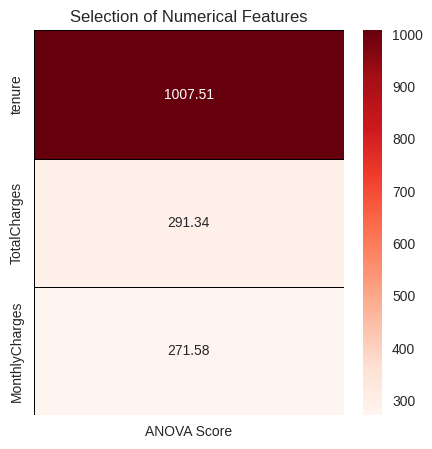

In [29]:
# Define features and target
X_num = df_encoded.loc[:, numerical_features]
target = df_encoded.loc[:, 'Churn']

# Apply ANOVA F-test
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(X_num, target)

# Create DataFrame of feature scores
featureScores = pd.DataFrame(
    data=fit.scores_,
    index=list(X_num.columns),
    columns=['ANOVA Score']
)

# Plot heatmap of scores
plt.subplots(figsize=(5,5))
sns.heatmap(
    featureScores.sort_values(ascending=False, by='ANOVA Score'),
    annot=True,
    cmap='Reds',  # Corrected: use a valid colormap string
    linewidths=0.4,
    linecolor='black',
    fmt='.2f'
)
plt.title('Selection of Numerical Features')
plt.show()

**Drop Unnecessary Features**

In [30]:
# Drop features with very low correlation/importance
df_encoded.drop(
    columns=[
        'PhoneService',
        'gender',
        'StreamingTV',
        'StreamingMovies',
        'MultipleLines',
        'InternetService'
    ],
    inplace=True
)

# Display updated dataset
df_encoded.head()


SeniorCitizen  Partner  Dependents  tenure  OnlineSecurity  OnlineBackup  \
0              0        1           0       1               0             2   
1              0        0           0      34               2             0   
2              0        0           0       2               2             2   
3              0        0           0      45               2             0   
4              0        0           0       2               0             0   

   DeviceProtection  TechSupport  Contract  PaperlessBilling  PaymentMethod  \
0                 0            0         0                 1              2   
1                 2            0         1                 0              3   
2                 0            0         0                 1              3   
3                 2            2         1                 0              0   
4                 0            0         0                 1              2   

   MonthlyCharges  TotalCharges  Churn  
0          29.850        29.850      0  
1          56.950      1889.500      0  
2          53.850       108.150      1  
3          42.300      1840.750      0  
4          70.700       151.650      1

**Train-Test Split (80-20)**

In [31]:
x_train, x_test, y_train, y_test = train_test_split(
    df_encoded.iloc[:, :-1], df_encoded.iloc[:, -1],
    test_size=0.20, random_state=2, stratify=df_encoded.iloc[:, -1]
)

In [32]:
print(f"Training samples: {x_train.shape[0]}")
print(f"Testing samples: {x_test.shape[0]}")

Training samples: 5625
Testing samples: 1407


**Data Balancing using SMOTE**

In [33]:
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

print("Original training set shape:", x_train.shape)
print("Resampled training set shape:", x_train_res.shape)
print("Original test set shape:", x_test.shape)

Original training set shape: (5625, 13)
Resampled training set shape: (8260, 13)
Original test set shape: (1407, 13)


**Function 1: Train + ROC-AUC**

In [34]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay

def model(classifier, x_train_res, y_train_res, x_test, y_test):
    # Train on SMOTE-resampled training data
    classifier.fit(x_train_res, y_train_res)

    # Predictions on test set (untouched real data)
    prediction = classifier.predict(x_test)
    prediction_proba = classifier.predict_proba(x_test)[:, 1]  # needed for ROC-AUC

    # Cross Validation ROC-AUC on resampled training set
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv_score = cross_val_score(classifier, x_train_res, y_train_res,
                               cv=cv, scoring='roc_auc').mean()
    print("Cross Validation ROC-AUC Score : ", f"{cv_score:.2%}")

    # ROC-AUC on test set
    roc_score = roc_auc_score(y_test, prediction_proba)
    print("Test ROC-AUC Score : ", f"{roc_score:.2%}")

    # ROC Curve
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC-AUC Curve')
    plt.show()


**Function 2: Confusion Matrix + Classification Report**

In [35]:
def model_evaluation(classifier, x_test, y_test):
    # Predictions on test set
    y_pred = classifier.predict(x_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = [f'{value:.2%}' for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred, digits=3))


**XGBoost Classifier**

In [36]:
# Initialize classifier
classifier_xgb = XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=1000,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Fit model on SMOTE-resampled training set
classifier_xgb.fit(x_train_res, y_train_res)

# Predictions on test set
y_pred = classifier_xgb.predict(x_test)
y_pred_proba = classifier_xgb.predict_proba(x_test)[:, 1]  # For ROC-AUC

# Print All Scores
print("XGBoost Performance Metrics")
print("============================")
print("Accuracy   :", round(accuracy_score(y_test, y_pred), 2))
print("Precision  :", round(precision_score(y_test, y_pred), 2))
print("Recall     :", round(recall_score(y_test, y_pred), 2))
print("F1 Score   :", round(f1_score(y_test, y_pred), 2))
print("ROC AUC    :", round(roc_auc_score(y_test, y_pred_proba), 2))

# Classification Report (detailed)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=2))


XGBoost Performance Metrics
Accuracy   : 0.76
Precision  : 0.54
Recall     : 0.7
F1 Score   : 0.61
ROC AUC    : 0.85

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1033
           1       0.54      0.70      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.76      0.77      1407



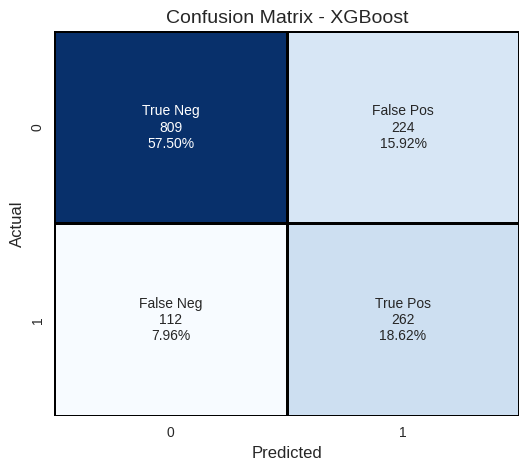

In [37]:
# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Define labels for matrix cells
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [f"{value}" for value in cm.flatten()]
percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]

# Combine labels into one string per cell
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2,2)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=1, linecolor='black')
plt.title("Confusion Matrix - XGBoost", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

<Figure size 600x500 with 0 Axes>

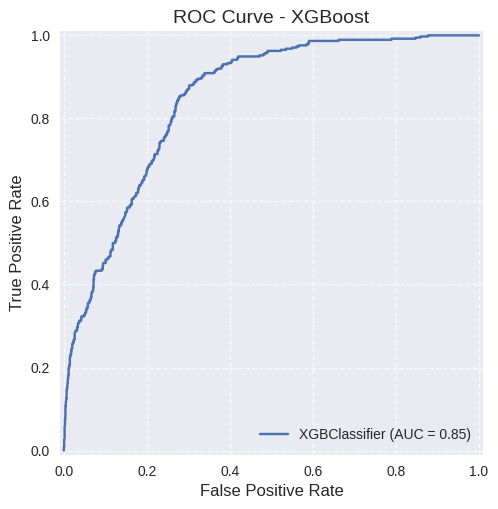

In [38]:
# 3. ROC Curve
plt.figure(figsize=(6,5))
RocCurveDisplay.from_estimator(classifier_xgb, x_test, y_test)
plt.title("ROC Curve - XGBoost", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

**LightGBM Classifier**

In [39]:
# Define LightGBM Classifier
classifier_lgbm = LGBMClassifier(
    learning_rate=0.01,
    max_depth=-1,            # -1 means no limit
    n_estimators=1000,
    random_state=42
)

# Fit model on SMOTE-resampled training data
classifier_lgbm.fit(x_train_res, y_train_res)

# Predictions on test set
y_pred = classifier_lgbm.predict(x_test)
y_pred_proba = classifier_lgbm.predict_proba(x_test)[:, 1]  # For ROC AUC

# Print All Scores
print("LightGBM Performance Metrics")
print("=============================")
print("Accuracy   :", round(accuracy_score(y_test, y_pred), 2))
print("Precision  :", round(precision_score(y_test, y_pred), 2))
print("Recall     :", round(recall_score(y_test, y_pred), 2))
print("F1 Score   :", round(f1_score(y_test, y_pred), 2))
print("ROC AUC    :", round(roc_auc_score(y_test, y_pred_proba), 2))

# Classification Report (detailed)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=2))


[LightGBM] [Info] Number of positive: 4130, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Performance Metrics
Accuracy   : 0.78
Precision  : 0.57
Recall     : 0.63
F1 Score   : 0.6
ROC AUC    : 0.84

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1033
           1       0.57      0.63      0.60       374

    accuracy                           0.78      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.78      0.78      0.78      1407



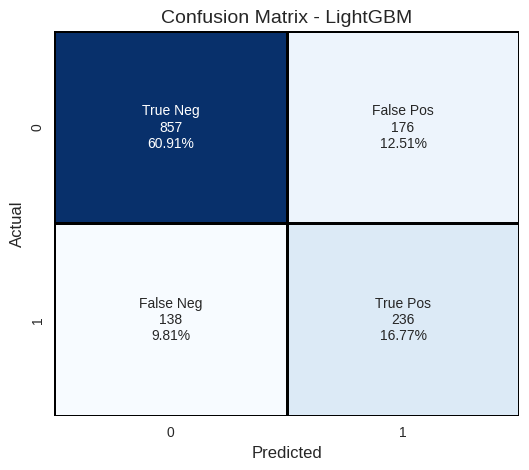

In [40]:
# 2. Confusion Matrix - LightGBM
cm = confusion_matrix(y_test, y_pred)

# Define labels for matrix cells
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [f"{value}" for value in cm.flatten()]
percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]

# Combine labels into one string per cell
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2,2)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=1, linecolor='black')
plt.title("Confusion Matrix - LightGBM", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

<Figure size 600x500 with 0 Axes>

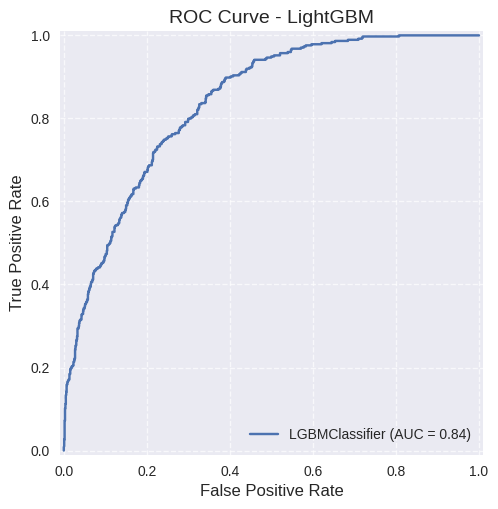

In [41]:
# 3. ROC Curve - LightGBM
plt.figure(figsize=(6,5))
RocCurveDisplay.from_estimator(classifier_lgbm, x_test, y_test)
plt.title("ROC Curve - LightGBM", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

**Random Forest Classifier**

In [42]:
# Define Random Forest Classifier
classifier_rf = RandomForestClassifier(
    n_estimators=300,         # number of trees
    max_depth=None,           # expand until all leaves are pure
    min_samples_split=2,      # minimum samples to split
    min_samples_leaf=1,       # minimum samples in a leaf
    random_state=42,
    n_jobs=-1,                # use all CPU cores
    class_weight=None         # SMOTE already balances the data
)

# Fit model on SMOTE-resampled training data
classifier_rf.fit(x_train_res, y_train_res)

# Predictions on test set
y_pred = classifier_rf.predict(x_test)
y_pred_proba = classifier_rf.predict_proba(x_test)[:, 1]  # For ROC AUC

# Print All Scores
print("Random Forest Performance Metrics")
print("================================")
print("Accuracy   :", round(accuracy_score(y_test, y_pred), 2))
print("Precision  :", round(precision_score(y_test, y_pred), 2))
print("Recall     :", round(recall_score(y_test, y_pred), 2))
print("F1 Score   :", round(f1_score(y_test, y_pred), 2))
print("ROC AUC    :", round(roc_auc_score(y_test, y_pred_proba), 2))

# Classification Report (detailed)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=2))

Random Forest Performance Metrics
Accuracy   : 0.77
Precision  : 0.56
Recall     : 0.57
F1 Score   : 0.57
ROC AUC    : 0.83

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1033
           1       0.56      0.57      0.57       374

    accuracy                           0.77      1407
   macro avg       0.70      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



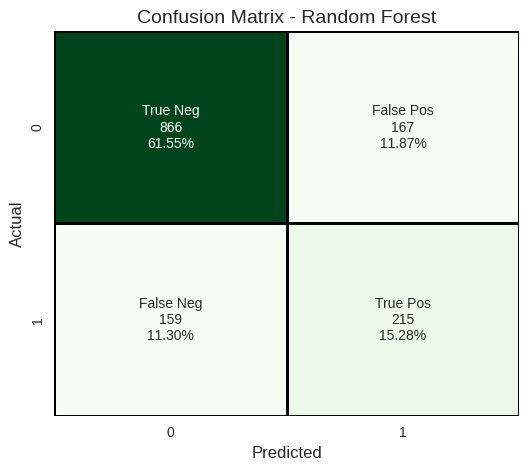

In [43]:
# 2. Confusion Matrix - Random Forest
cm = confusion_matrix(y_test, y_pred)

# Define labels for matrix cells
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [f"{value}" for value in cm.flatten()]
percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]

# Combine into one string per cell
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2,2)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Greens', cbar=False,
            linewidths=1, linecolor='black')
plt.title("Confusion Matrix - Random Forest", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

<Figure size 600x500 with 0 Axes>

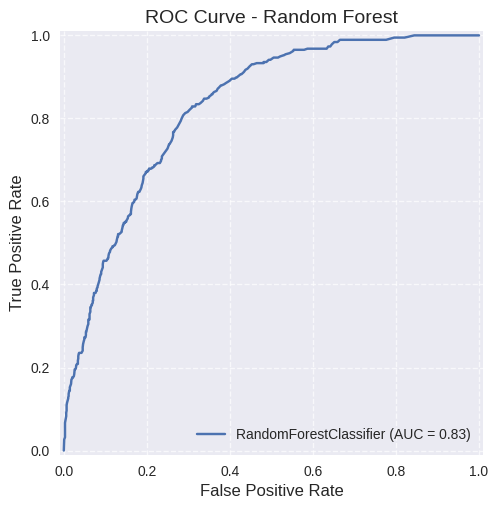

In [44]:
# 3. ROC Curve - Random Forest
plt.figure(figsize=(6,5))
RocCurveDisplay.from_estimator(classifier_rf, x_test, y_test)
plt.title("ROC Curve - Random Forest", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

**AdaBoost Classifier**

In [45]:
# Define AdaBoost Classifier
classifier_ada = AdaBoostClassifier(
    n_estimators=200,     # number of weak learners (stumps by default)
    learning_rate=0.05,   # shrink contribution of each classifier
    random_state=42
)

# Fit model on SMOTE-resampled training data
classifier_ada.fit(x_train_res, y_train_res)

# Predictions on test set
y_pred = classifier_ada.predict(x_test)
y_pred_proba = classifier_ada.predict_proba(x_test)[:, 1]  # For ROC AUC

# Print All Scores
print("AdaBoost Performance Metrics")
print("=============================")
print("Accuracy   :", round(accuracy_score(y_test, y_pred), 2))
print("Precision  :", round(precision_score(y_test, y_pred), 2))
print("Recall     :", round(recall_score(y_test, y_pred), 2))
print("F1 Score   :", round(f1_score(y_test, y_pred), 2))
print("ROC AUC    :", round(roc_auc_score(y_test, y_pred_proba), 2))

# Classification Report (detailed)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=2))


AdaBoost Performance Metrics
Accuracy   : 0.7
Precision  : 0.47
Recall     : 0.9
F1 Score   : 0.62
ROC AUC    : 0.84

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.63      0.76      1033
           1       0.47      0.90      0.62       374

    accuracy                           0.70      1407
   macro avg       0.71      0.76      0.69      1407
weighted avg       0.82      0.70      0.72      1407



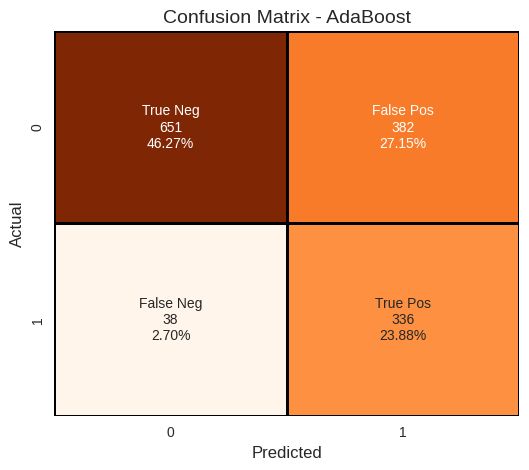

In [46]:
# 2. Confusion Matrix - AdaBoost
cm = confusion_matrix(y_test, y_pred)

# Define labels for matrix cells
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [f"{value}" for value in cm.flatten()]
percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]

# Combine into one string per cell
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2,2)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', cbar=False,
            linewidths=1, linecolor='black')
plt.title("Confusion Matrix - AdaBoost", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

<Figure size 600x500 with 0 Axes>

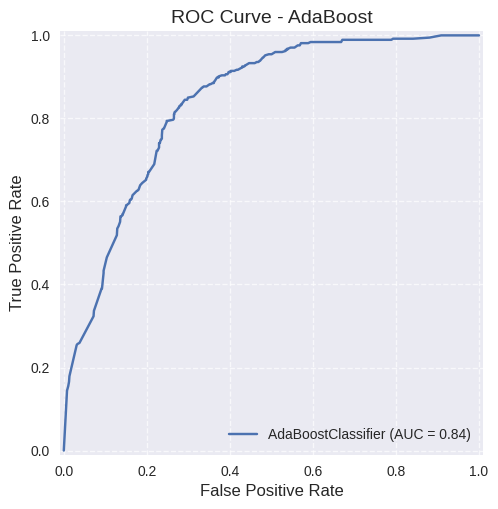

In [47]:
# 3. ROC Curve - AdaBoost
plt.figure(figsize=(6,5))
RocCurveDisplay.from_estimator(classifier_ada, x_test, y_test)
plt.title("ROC Curve - AdaBoost", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

**Naïve Bayes Classifier**

In [48]:
# Define Naïve Bayes Classifier
classifier_nb = GaussianNB()

# Fit model on SMOTE-resampled training data
classifier_nb.fit(x_train_res, y_train_res)

# Predictions on test set
y_pred = classifier_nb.predict(x_test)
y_pred_proba = classifier_nb.predict_proba(x_test)[:, 1]  # For ROC AUC

# Print All Scores
print("Naïve Bayes Performance Metrics")
print("================================")
print("Accuracy   :", round(accuracy_score(y_test, y_pred), 2))
print("Precision  :", round(precision_score(y_test, y_pred), 2))
print("Recall     :", round(recall_score(y_test, y_pred), 2))
print("F1 Score   :", round(f1_score(y_test, y_pred), 2))
print("ROC AUC    :", round(roc_auc_score(y_test, y_pred_proba), 2))

# Classification Report (detailed)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=2))


Naïve Bayes Performance Metrics
Accuracy   : 0.72
Precision  : 0.49
Recall     : 0.77
F1 Score   : 0.6
ROC AUC    : 0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.77      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407



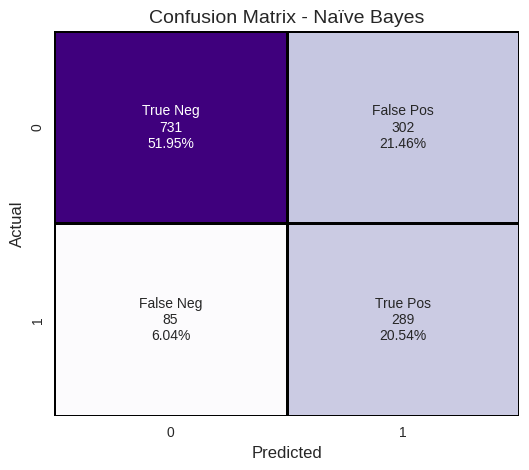

In [49]:
# 2. Confusion Matrix - Naïve Bayes
cm = confusion_matrix(y_test, y_pred)

# Define labels for matrix cells
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [f"{value}" for value in cm.flatten()]
percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]

# Combine into one string per cell
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2,2)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Purples', cbar=False,
            linewidths=1, linecolor='black')
plt.title("Confusion Matrix - Naïve Bayes", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

<Figure size 600x500 with 0 Axes>

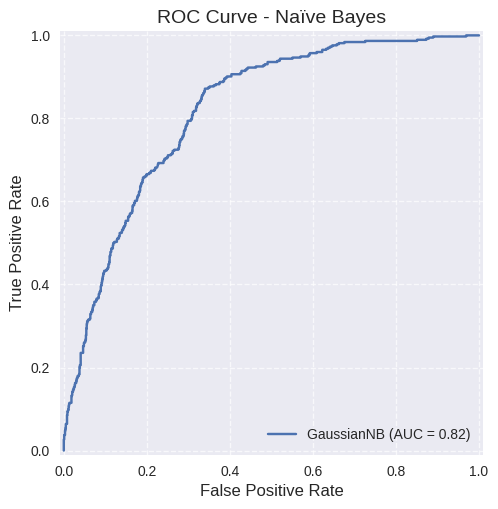

In [50]:
# 3. ROC Curve - Naïve Bayes
plt.figure(figsize=(6,5))
RocCurveDisplay.from_estimator(classifier_nb, x_test, y_test)
plt.title("ROC Curve - Naïve Bayes", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

**Model Comparison**

In [51]:
# Helper Function to Evaluate Models
def evaluate_model(name, model, x_train_res, y_train_res, x_test, y_test):
    """Train the model, predict, and return all key performance metrics."""

    # Train model on SMOTE-resampled training data
    model.fit(x_train_res, y_train_res)

    # Predictions
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Handle cases where predict_proba is not available
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc
    }

# Collect Results for All Models
results = []
results.append(evaluate_model("XGBoost", classifier_xgb, x_train_res, y_train_res, x_test, y_test))
results.append(evaluate_model("LightGBM", classifier_lgbm, x_train_res, y_train_res, x_test, y_test))
results.append(evaluate_model("Random Forest", classifier_rf, x_train_res, y_train_res, x_test, y_test))
results.append(evaluate_model("AdaBoost", classifier_ada, x_train_res, y_train_res, x_test, y_test))
results.append(evaluate_model("Naïve Bayes", classifier_nb, x_train_res, y_train_res, x_test, y_test))

# Convert to DataFrame
comparison_df = pd.DataFrame(results).set_index("Model")

# Display Comparison Table with Styling
print("\nModel Performance Comparison:\n")
display(comparison_df.style.background_gradient(cmap="Blues").format("{:.2f}"))


[LightGBM] [Info] Number of positive: 4130, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Model Performance Comparison:



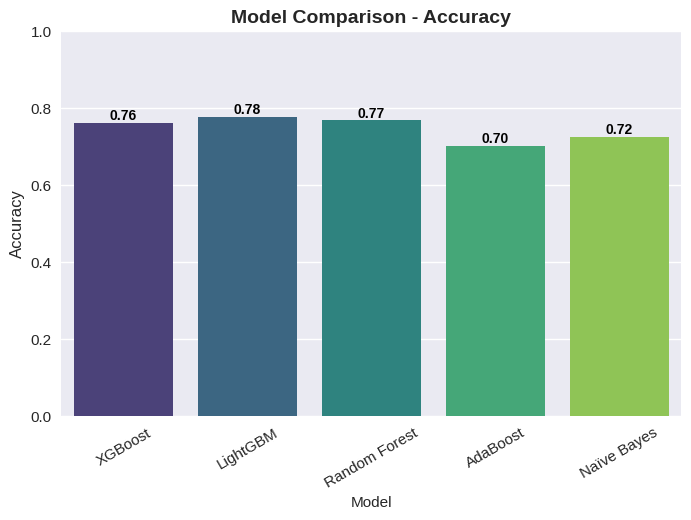

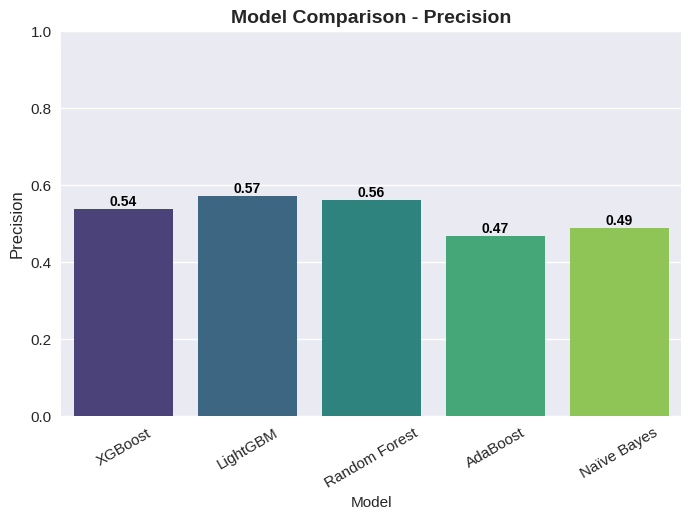

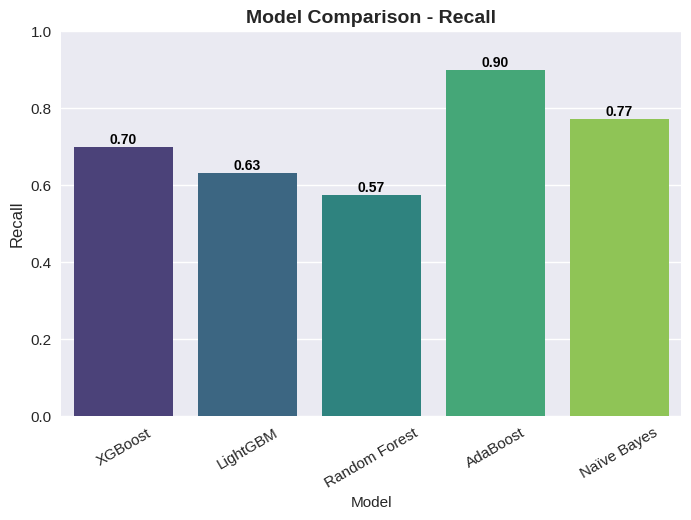

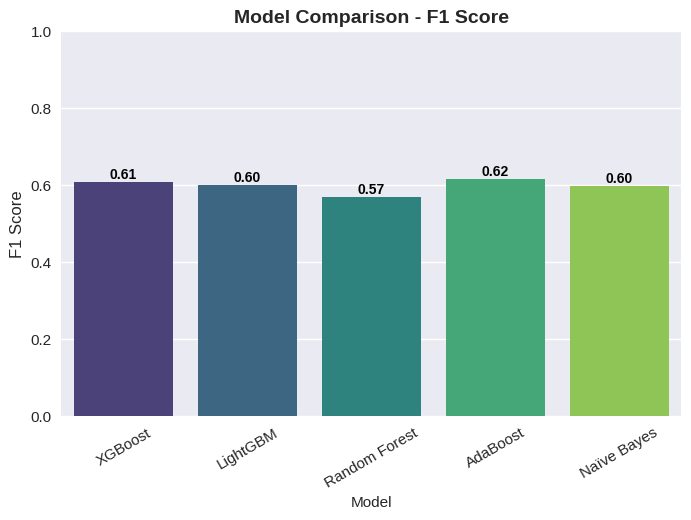

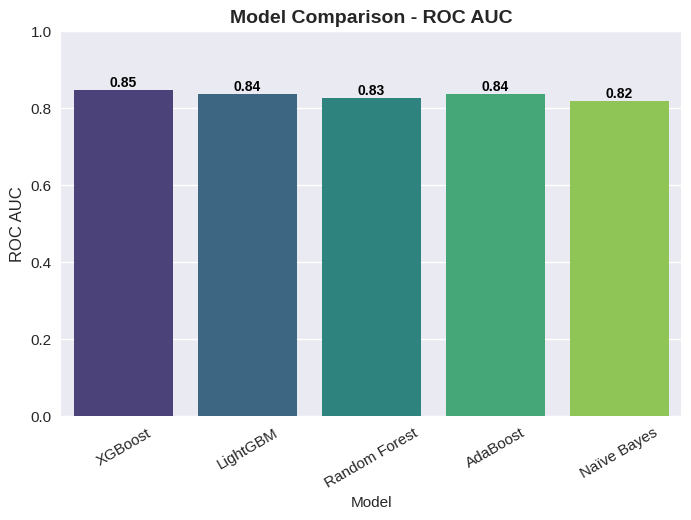

In [52]:
# Plot Bar Charts for Each Metric
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]

for metric in metrics:
    # Skip plotting ROC AUC if any model didn’t support predict_proba
    if metric == "ROC AUC" and comparison_df[metric].isnull().any():
        print(f"\nSkipping plot for {metric} as some models do not support probability prediction.")
        continue

    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x=comparison_df.index, y=comparison_df[metric], palette="viridis")

    # Add value labels on bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=10, fontweight='bold', color='black')

    plt.title(f"Model Comparison - {metric}", fontsize=14, fontweight="bold")
    plt.ylabel(metric, fontsize=12)
    plt.ylim(0, 1)  # all metrics range from 0 to 1
    plt.xticks(rotation=30, fontsize=11)
    plt.yticks(fontsize=11)
    plt.show()

**Overall Best Model**

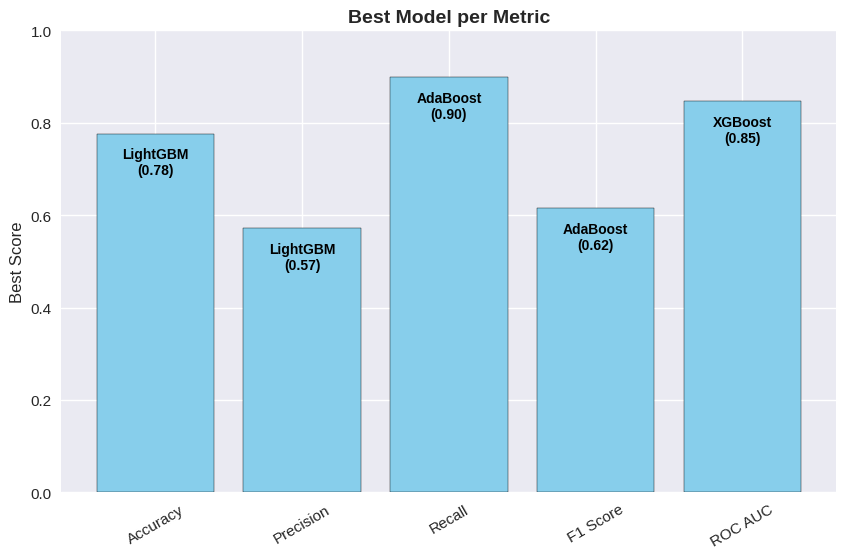

In [53]:
# Best Model per Metric
best_per_metric = {}
for metric in comparison_df.columns:
    best_model = comparison_df[metric].idxmax()
    best_score = comparison_df[metric].max()
    best_per_metric[metric] = (best_model, best_score)

# Convert to DataFrame
best_df = pd.DataFrame(best_per_metric, index=["Best Model", "Best Score"]).T

# Bar Plot for Best Models
plt.figure(figsize=(10, 6))
bars = plt.bar(best_df.index, best_df["Best Score"], color="skyblue", edgecolor="black")

# Annotate bars with model name + score (only for valid bars)
for bar, (model, score) in zip(bars, zip(best_df["Best Model"], best_df["Best Score"])):
    if not pd.isna(score):  # skip if score is NaN or invalid
        plt.text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() - 0.03,   # place text inside the bar
                 f"{model}\n({score:.2f})",
                 ha='center', va='top', fontsize=10, fontweight="bold", color="black")

# Title and labels
plt.title("Best Model per Metric", fontsize=14, fontweight="bold")
plt.ylabel("Best Score", fontsize=12)
plt.ylim(0, 1.0)  # adjust range to keep everything visible
plt.xticks(rotation=30, fontsize=11)
plt.yticks(fontsize=11)
plt.show()


**SHAP (SHapley Additive exPlanations)**

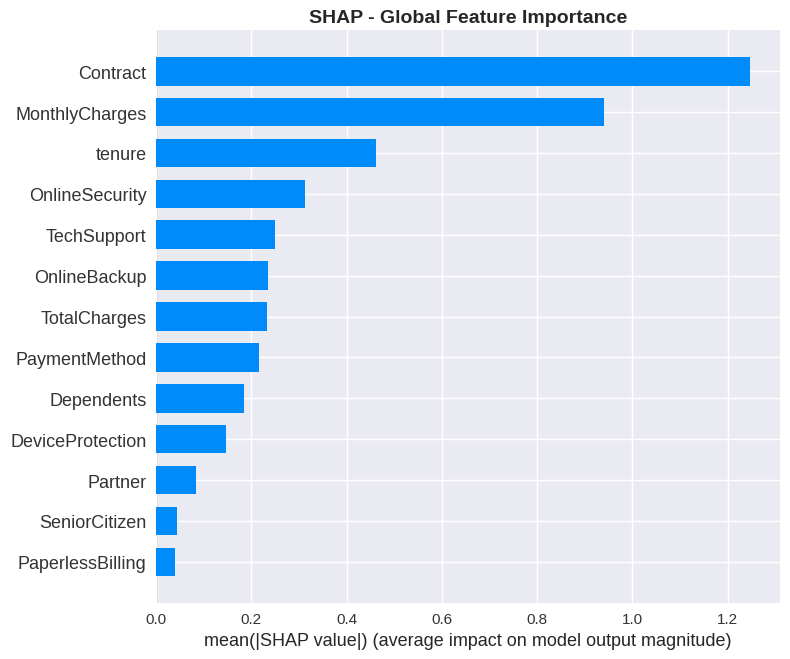

In [54]:
# Initialize SHAP explainer for LightGBM
explainer = shap.TreeExplainer(classifier_lgbm)
shap_values = explainer.shap_values(x_test)

# 1. Global Feature Importance
plt.title("SHAP - Global Feature Importance", fontsize=14, fontweight="bold")
shap.summary_plot(shap_values, x_test, plot_type="bar", feature_names=df_encoded.drop("Churn", axis=1).columns)

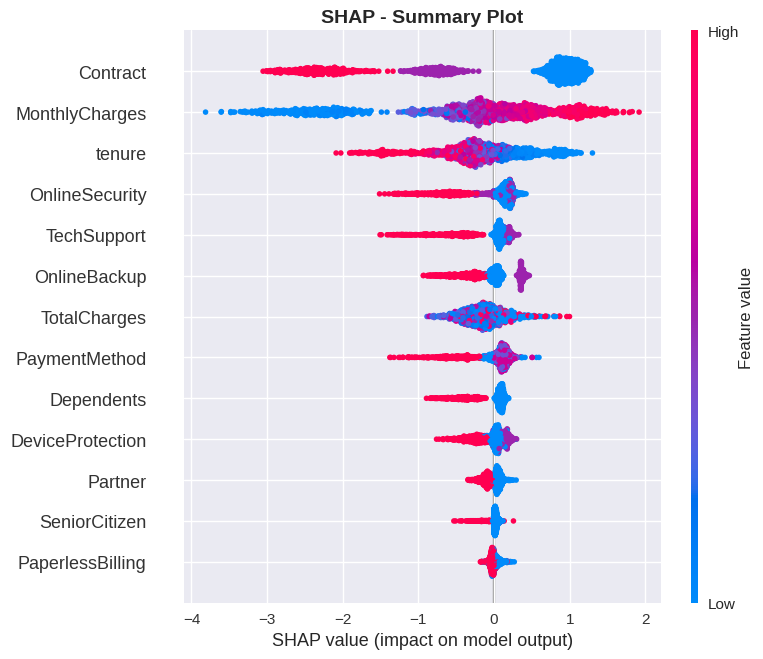

In [55]:
# 2. Detailed Feature Impact
plt.title("SHAP - Summary Plot", fontsize=14, fontweight="bold")
shap.summary_plot(shap_values, x_test, feature_names=df_encoded.drop("Churn", axis=1).columns)

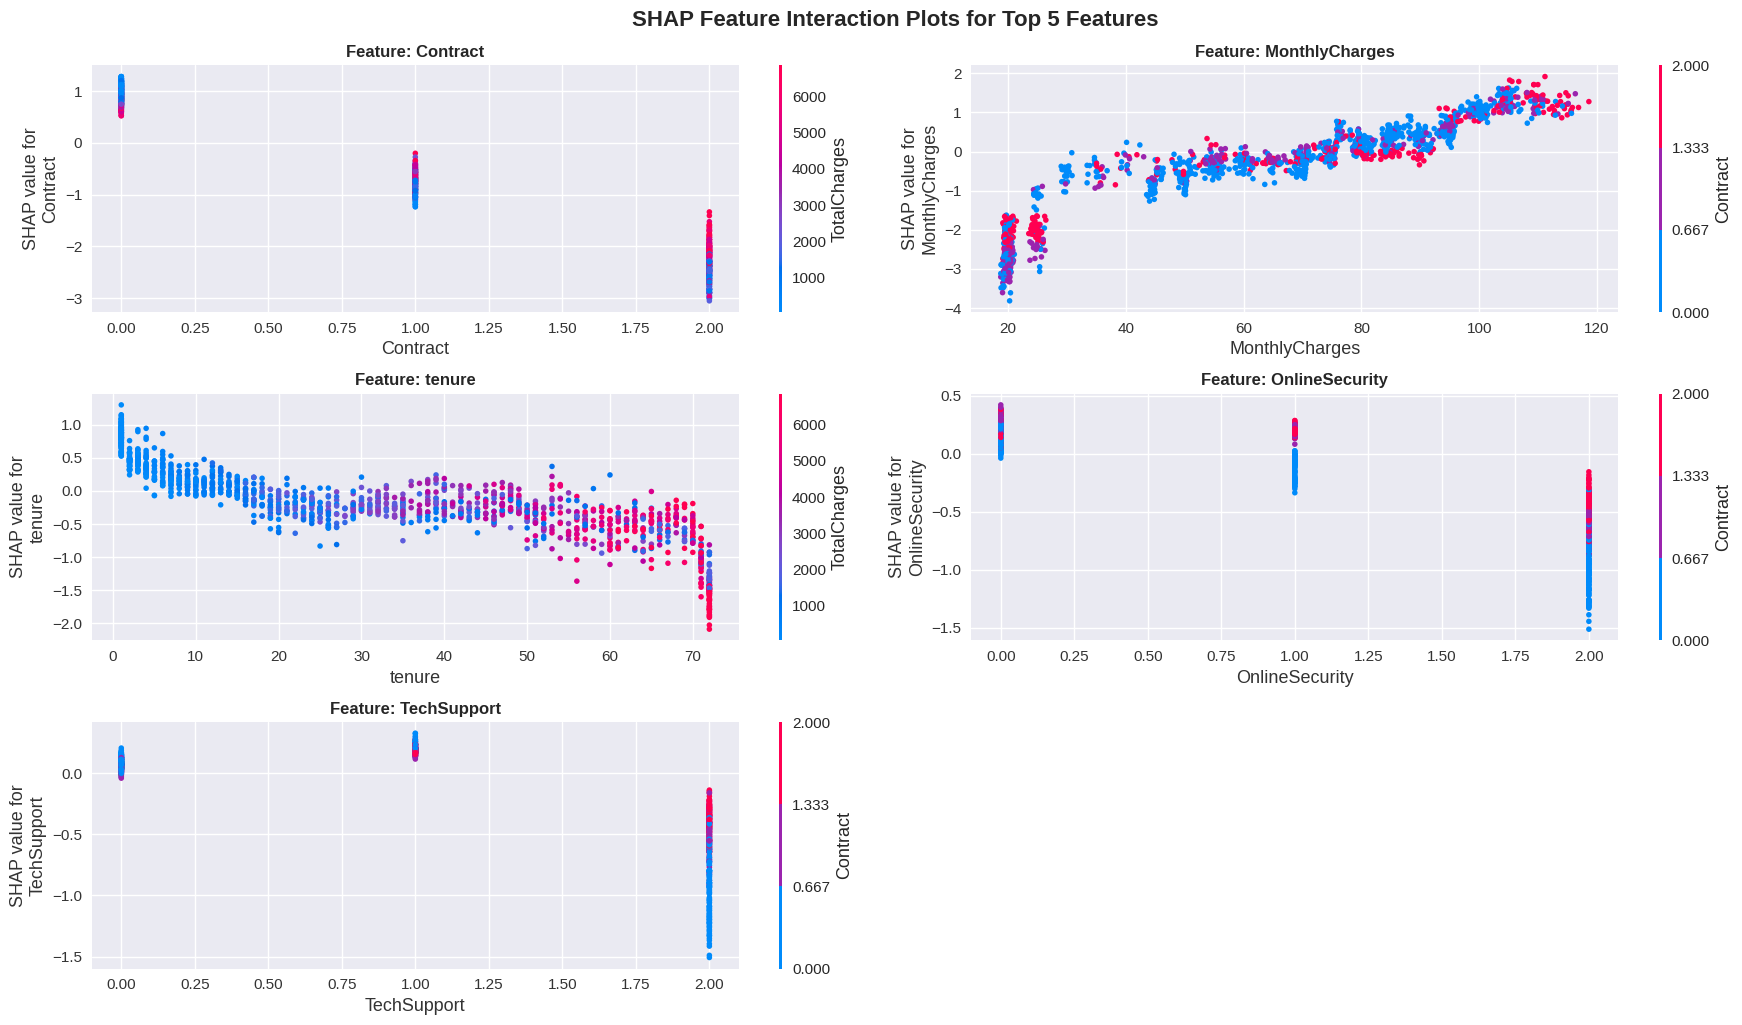

In [56]:
# Define the top 5 features
top_features = ["Contract", "MonthlyCharges", "tenure", "OnlineSecurity", "TechSupport"]

# Set up a subplot grid
fig, axes = plt.subplots(3, 2, figsize=(18, 10))
axes = axes.flatten()

# Loop through each feature and create the dependence plot on the respective axis
for i, feature in enumerate(top_features):
    shap.dependence_plot(
        feature,
        shap_values,
        x_test,
        interaction_index="auto",
        ax=axes[i],
        show=False  # prevent displaying immediately
    )
    axes[i].set_title(f"Feature: {feature}", fontsize=12, fontweight='bold')

# Hide the unused subplot (since we have 6 grid spots for 5 plots)
if len(top_features) < len(axes):
    for j in range(len(top_features), len(axes)):
        fig.delaxes(axes[j])

# Improve spacing and display the combined figure
plt.tight_layout()
plt.suptitle("SHAP Feature Interaction Plots for Top 5 Features", fontsize=16, fontweight='bold', y=1.02)
plt.show()

# **SHAP Force Plot**

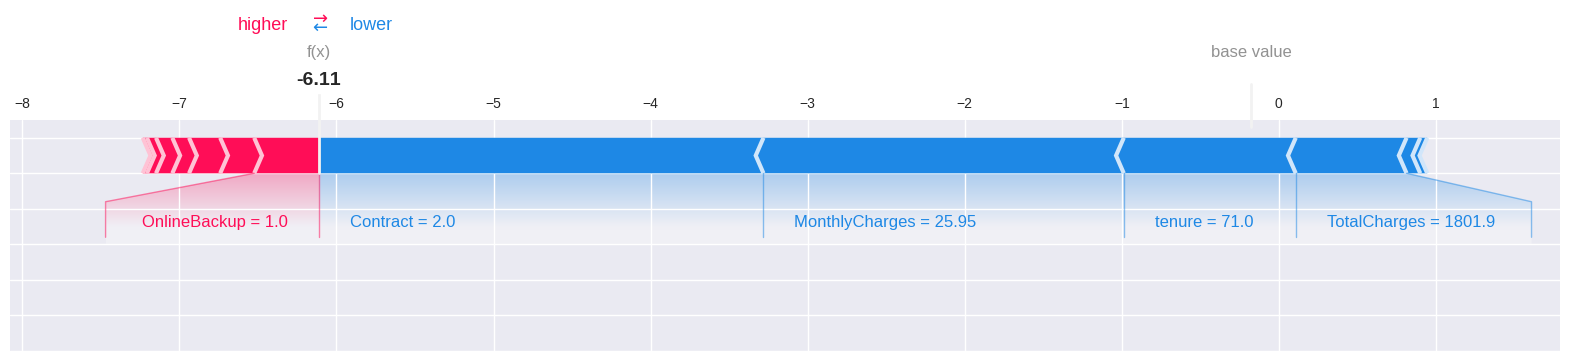


Customer 800 has a predicted churn probability of 0.00.
 This customer is at LOW risk of churn.


In [57]:
# Initialize SHAP JS visualizations
shap.initjs()

# Specific customer index
customer_index = 800

# Ensure x_test is DataFrame with feature names
if isinstance(x_test, pd.DataFrame) == False:
    x_test = pd.DataFrame(x_test, columns=df_encoded.drop(columns=['Churn']).columns)

# Recompute SHAP values
explainer = shap.TreeExplainer(classifier_lgbm)
shap_values = explainer.shap_values(x_test)

# Handle expected_value correctly
expected_val = explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value
shap_val = shap_values[1][customer_index] if isinstance(shap_values, list) else shap_values[customer_index]

# Force Plot
shap.force_plot(
    expected_val,
    shap_val,
    x_test.iloc[customer_index, :],
    feature_names=x_test.columns,
    matplotlib=True,
    show=True
)

# Add Interpretation
# Predicted probability of churn
pred_prob = classifier_lgbm.predict_proba(x_test.iloc[[customer_index]])[:, 1][0]

print(f"\nCustomer {customer_index} has a predicted churn probability of {pred_prob:.2f}.")

# Highlight key insights
if pred_prob > 0.7:
    print(" This customer is at HIGH risk of churn.")
elif pred_prob > 0.4:
    print(" This customer is at MEDIUM risk of churn.")
else:
    print(" This customer is at LOW risk of churn.")

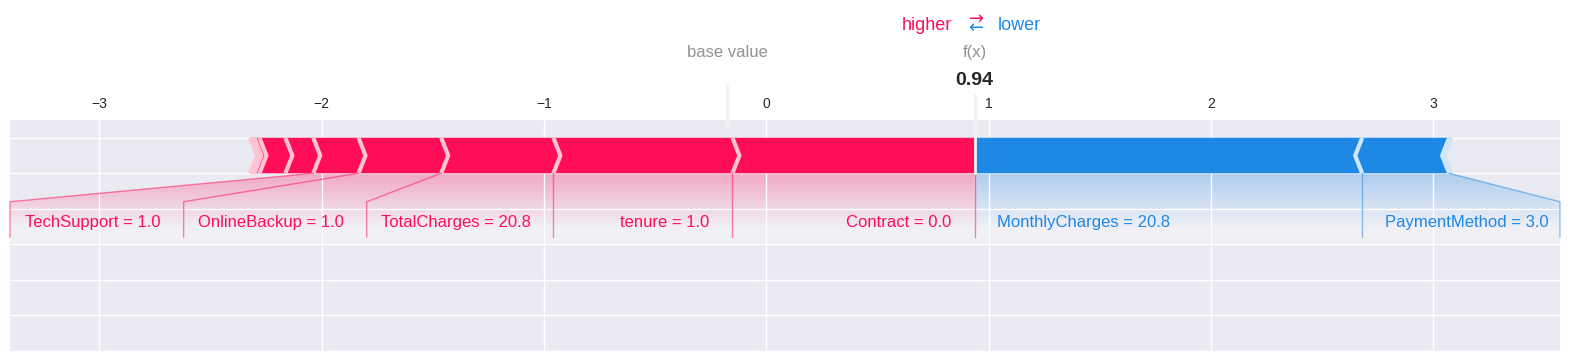


Customer 1400 has a predicted churn probability of 0.72.
 This customer is at HIGH risk of churn.


In [58]:
# Initialize SHAP JS visualizations
shap.initjs()

# Specific customer index
customer_index = 1400

# Ensure x_test is DataFrame with feature names
if isinstance(x_test, pd.DataFrame) == False:
    x_test = pd.DataFrame(x_test, columns=df_encoded.drop(columns=['Churn']).columns)

# Recompute SHAP values
explainer = shap.TreeExplainer(classifier_lgbm)
shap_values = explainer.shap_values(x_test)

# Handle expected_value correctly
expected_val = explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value
shap_val = shap_values[1][customer_index] if isinstance(shap_values, list) else shap_values[customer_index]

# Force Plot
shap.force_plot(
    expected_val,
    shap_val,
    x_test.iloc[customer_index, :],
    feature_names=x_test.columns,
    matplotlib=True,
    show=True
)

# Add Interpretation
# Predicted probability of churn
pred_prob = classifier_lgbm.predict_proba(x_test.iloc[[customer_index]])[:, 1][0]

print(f"\nCustomer {customer_index} has a predicted churn probability of {pred_prob:.2f}.")

# Highlight key insights
if pred_prob > 0.7:
    print(" This customer is at HIGH risk of churn.")
elif pred_prob > 0.4:
    print(" This customer is at MEDIUM risk of churn.")
else:
    print(" This customer is at LOW risk of churn.")

# **LIME for Model Interpretability**

LIME Explanation for Customer 800:


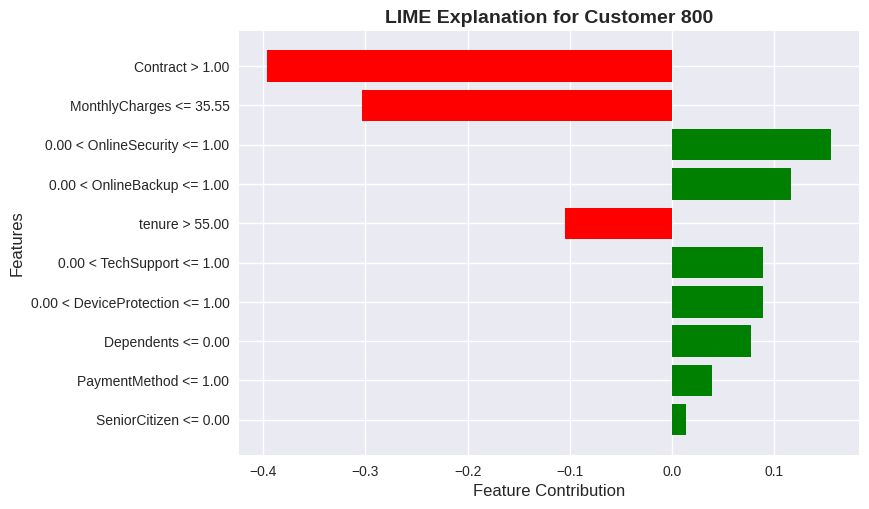

In [59]:
# Ensure x_train and x_test are DataFrames with feature names
if isinstance(x_train, pd.DataFrame) == False:
    feature_names = df1.drop(columns=['Churn']).columns
    x_train = pd.DataFrame(x_train, columns=feature_names)
    x_test = pd.DataFrame(x_test, columns=feature_names)

# Initialize LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    class_names=['No Churn', 'Churn'],  # binary classification
    mode='classification'
)

# Customer for Explanation
customer_index = 800
customer_data = x_test.iloc[customer_index]

# Generate Explanation
exp = explainer.explain_instance(
    data_row=customer_data,
    predict_fn=classifier_lgbm.predict_proba,
    num_features=10
)

# Show Explanation
print(f"LIME Explanation for Customer {customer_index}:")
exp.show_in_notebook(show_table=True)
fig = exp.as_pyplot_figure()
fig.set_facecolor("white")
plt.title(f"LIME Explanation for Customer {customer_index}", fontsize=14, fontweight="bold")
plt.xlabel("Feature Contribution", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()

LIME Explanation for Customer 1400:


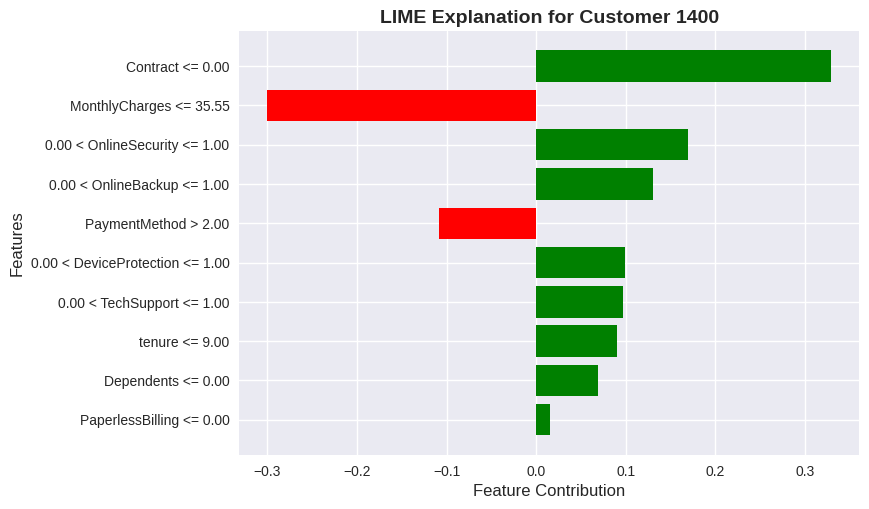

In [60]:
# Ensure x_train and x_test are DataFrames with feature names
if isinstance(x_train, pd.DataFrame) == False:
    feature_names = df1.drop(columns=['Churn']).columns
    x_train = pd.DataFrame(x_train, columns=feature_names)
    x_test = pd.DataFrame(x_test, columns=feature_names)

# Initialize LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    class_names=['No Churn', 'Churn'],  # binary classification
    mode='classification'
)

# Customer for Explanation
customer_index = 1400
customer_data = x_test.iloc[customer_index]

# Generate Explanation
exp = explainer.explain_instance(
    data_row=customer_data,
    predict_fn=classifier_lgbm.predict_proba,
    num_features=10
)

# Show Explanation
print(f"LIME Explanation for Customer {customer_index}:")
exp.show_in_notebook(show_table=True)
fig = exp.as_pyplot_figure()
fig.set_facecolor("white")
plt.title(f"LIME Explanation for Customer {customer_index}", fontsize=14, fontweight="bold")
plt.xlabel("Feature Contribution", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()